# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [3]:
raw_penguins=palmerpenguins.load_penguins_raw()
raw_penguins

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

#### Datos previamente procesados

In [4]:
preprocess_penguins=palmerpenguins.load_penguins()
preprocess_penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

### Utilizando los conjuntos de datos de `seaborn`

In [5]:
sns.load_dataset('penguins')

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [6]:
pd.read_csv('penguins_raw.csv')

studyName  Sample Number                                    Species  \
0     PAL0708              1        Adelie Penguin (Pygoscelis adeliae)   
1     PAL0708              2        Adelie Penguin (Pygoscelis adeliae)   
2     PAL0708              3        Adelie Penguin (Pygoscelis adeliae)   
3     PAL0708              4        Adelie Penguin (Pygoscelis adeliae)   
4     PAL0708              5        Adelie Penguin (Pygoscelis adeliae)   
..        ...            ...                                        ...   
339   PAL0910             64  Chinstrap penguin (Pygoscelis antarctica)   
340   PAL0910             65  Chinstrap penguin (Pygoscelis antarctica)   
341   PAL0910             66  Chinstrap penguin (Pygoscelis antarctica)   
342   PAL0910             67  Chinstrap penguin (Pygoscelis antarctica)   
343   PAL0910             68  Chinstrap penguin (Pygoscelis antarctica)   

     Region     Island               Stage Individual ID Clutch Completion  \
0    Anvers  Torgersen  Adult, 1 Egg Stage          N1A1               Yes   
1    Anvers  Torgersen  Adult, 1 Egg Stage          N1A2               Yes   
2    Anvers  Torgersen  Adult, 1 Egg Stage          N2A1               Yes   
3    Anvers  Torgersen  Adult, 1 Egg Stage          N2A2               Yes   
4    Anvers  Torgersen  Adult, 1 Egg Stage          N3A1               Yes   
..      ...        ...                 ...           ...               ...   
339  Anvers      Dream  Adult, 1 Egg Stage         N98A2               Yes   
340  Anvers      Dream  Adult, 1 Egg Stage         N99A1                No   
341  Anvers      Dream  Adult, 1 Egg Stage         N99A2                No   
342  Anvers      Dream  Adult, 1 Egg Stage        N100A1               Yes   
343  Anvers      Dream  Adult, 1 Egg Stage        N100A2               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0    2007-11-11                39.1               18.7                181.0   
1    2007-11-11                39.5               17.4                186.0   
2    2007-11-16                40.3               18.0                195.0   
3    2007-11-16                 NaN                NaN                  NaN   
4    2007-11-16                36.7               19.3                193.0   
..          ...                 ...                ...                  ...   
339  2009-11-19                55.8               19.8                207.0   
340  2009-11-21                43.5               18.1                202.0   
341  2009-11-21                49.6               18.2                193.0   
342  2009-11-21                50.8               19.0                210.0   
343  2009-11-21                50.2               18.7                198.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339         4000.0    MALE            9.70465          -24.53494   
340         3400.0  FEMALE            9.37608          -24.40753   
341         3775.0    MALE            9.46180          -24.70615   
342         4100.0    MALE            9.98044          -24.68741   
343         3775.0  FEMALE            9.39305          -24.25255   

                                  Comments  
0           Not enough blood for isotopes.  
1                                      NaN  
2                                      NaN  
3                       Adult not sampled.  
4                                      NaN  
..                                     ...  
339                                    NaN  
340  Nest never observed with full clutc

In [7]:
df_preprocess_data=pd.read_csv('penguins.csv')

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [8]:
df_preprocess_data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [9]:
df_preprocess_data.dtypes.value_counts()


float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [10]:
df_preprocess_data.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [11]:
df_preprocess_data.isnull().any()


species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [12]:
df_preprocess_data.isnull().sum()
df_preprocess_data.isna().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [13]:

df_preprocess_data.isnull().sum().sum()


19

## ¿Cuál es la proporción de valores nulos por cada variable?

In [14]:
df_preprocess_data.isnull().melt()

variable  value
0     species  False
1     species  False
2     species  False
3     species  False
4     species  False
...       ...    ...
2747     year  False
2748     year  False
2749     year  False
2750     year  False
2751     year  False

[2752 rows x 2 columns]

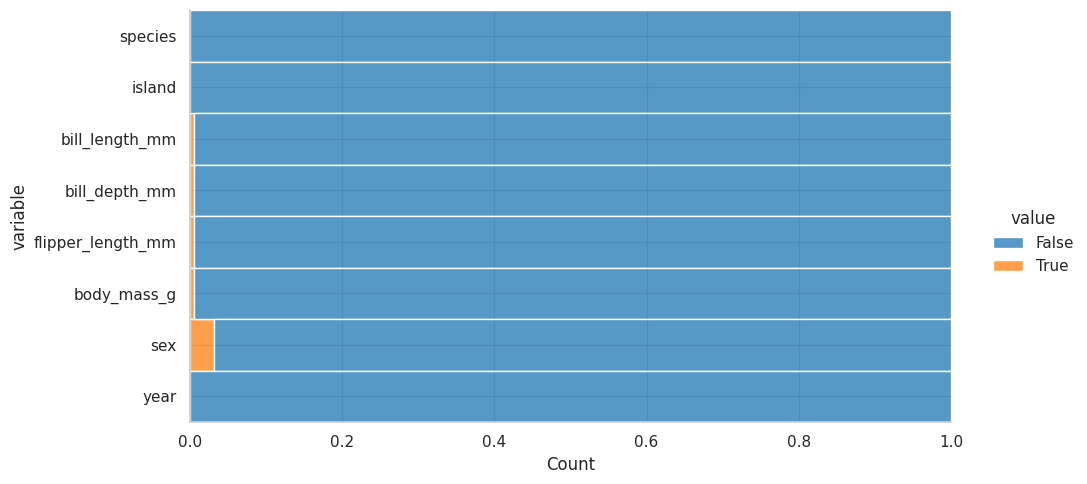

In [15]:
df_preprocess_data.isnull().melt().pipe(lambda df: sns.displot(data=df,y='variable',hue='value',multiple='fill',aspect=2))
#melt todo en una columna

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

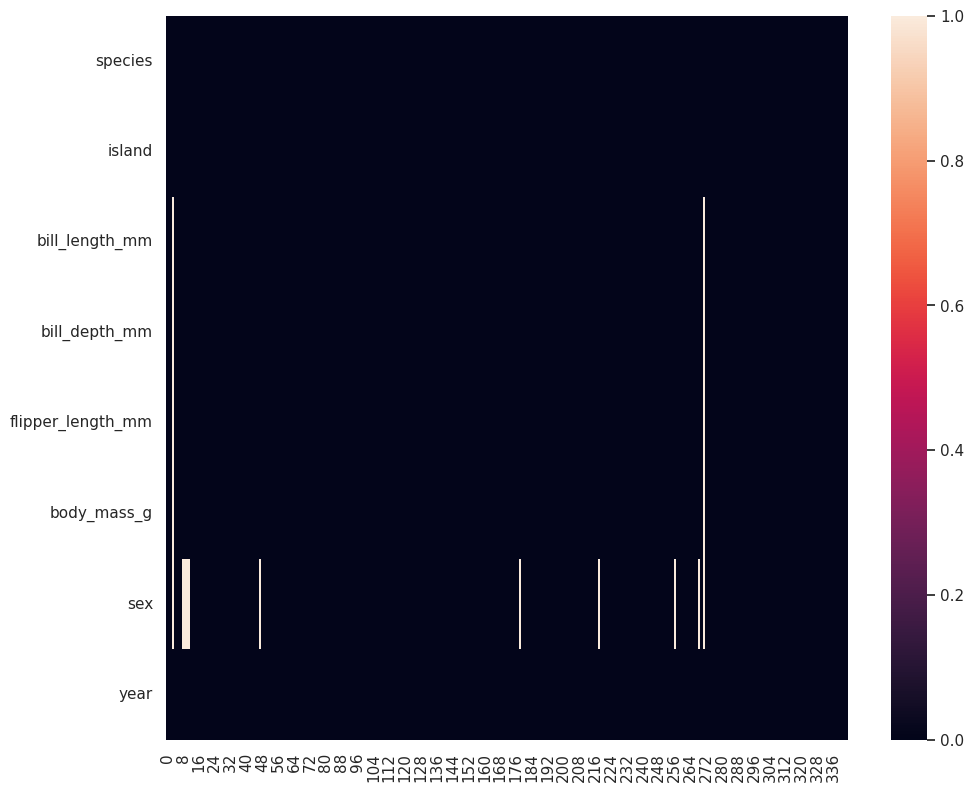

In [16]:
df_preprocess_data.isnull().transpose().pipe(lambda df: sns.heatmap(data=df)) #por cada pinguino 

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [17]:
df_preprocess_data.shape

(344, 8)

In [18]:
df_preprocess_penguins=df_preprocess_data.dropna()
df_preprocess_penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [19]:
df_preprocess_penguins.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
unique          NaN     2          NaN  
top             NaN  male          NaN  
freq            NaN   168          NaN  
mean    4207.057057   NaN  2008.042042  
std      805.215802   NaN     0.812944  
min     2700.000000   NaN  2007.000000  
25%     3550.000000   NaN  2007.000000  
50%     4050.000000   NaN  2008.000000  
75%     4775.000000   NaN  2009.000000  
max     6300.000000   NaN  2009.000000

### Solo las numéricas

In [20]:
df_preprocess_penguins.describe(include=np.number)

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

### Solo categóricas - 1

In [21]:
df_preprocess_penguins.describe(include='object')

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

### Solo categóricas - 2

In [22]:
df_preprocess_penguins.astype({
    'species':'category',
    'island':'category',
    'sex':'category'
})

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]

## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

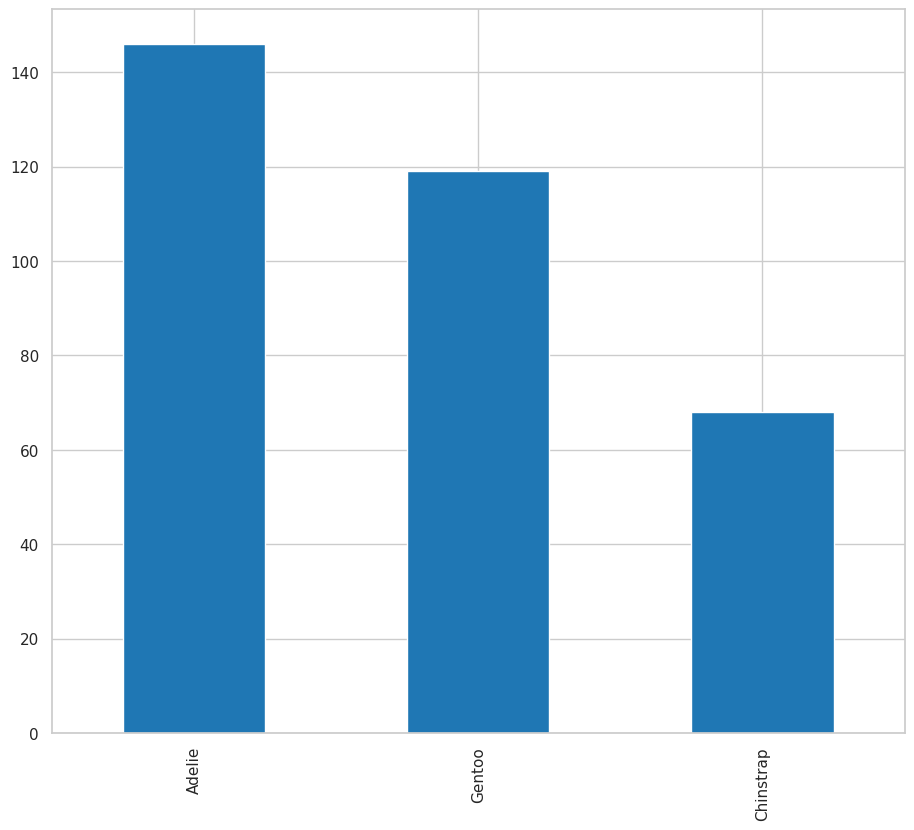

In [23]:
df_preprocess_penguins.species.value_counts().plot(kind='bar')

### Seaborn

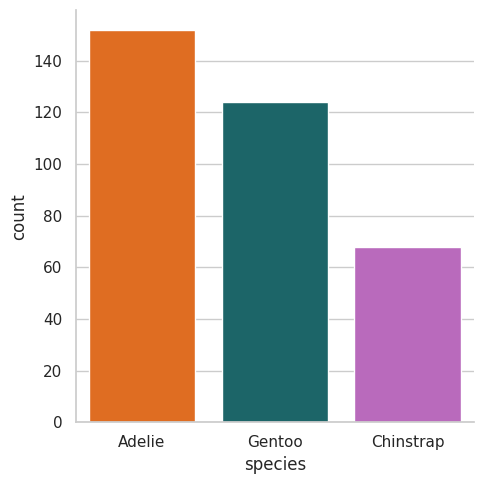

In [24]:
sns.catplot(data=df_preprocess_data,x='species',kind='count',palette=penguin_color)

<AxesSubplot: xlabel='species', ylabel='count'>

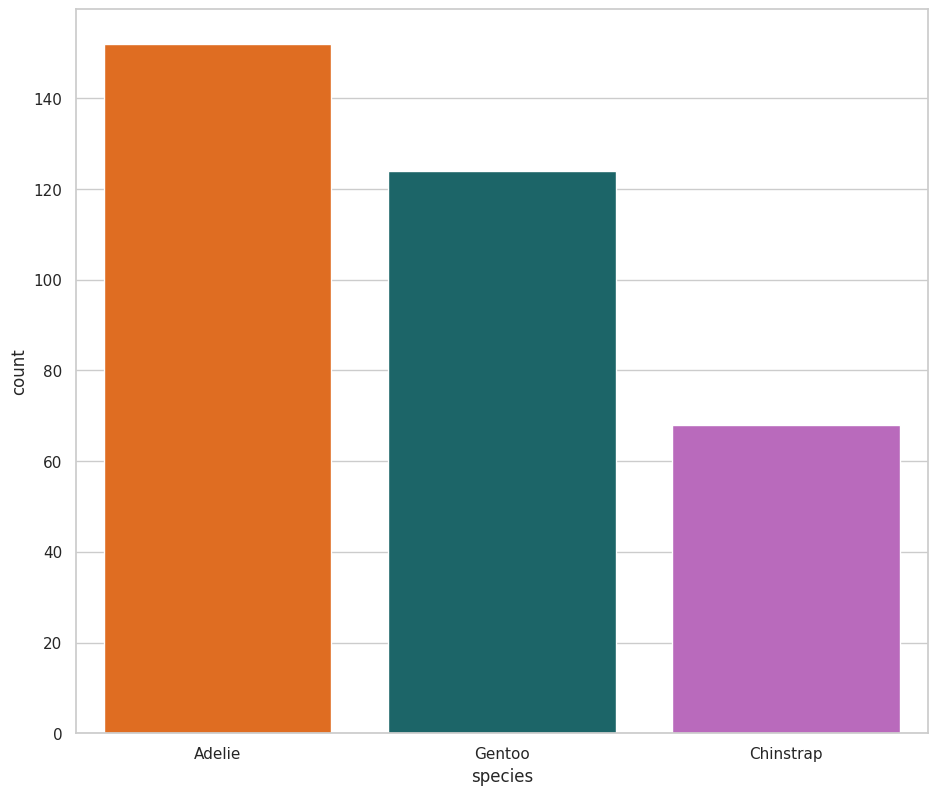

In [25]:
df_preprocess_data.value_counts('species',sort=True).reset_index(name='count').pipe(lambda df: sns.barplot(data=df,x='species',y='count',palette=penguin_color))

### ¿Cómo visualizar las proporciones?

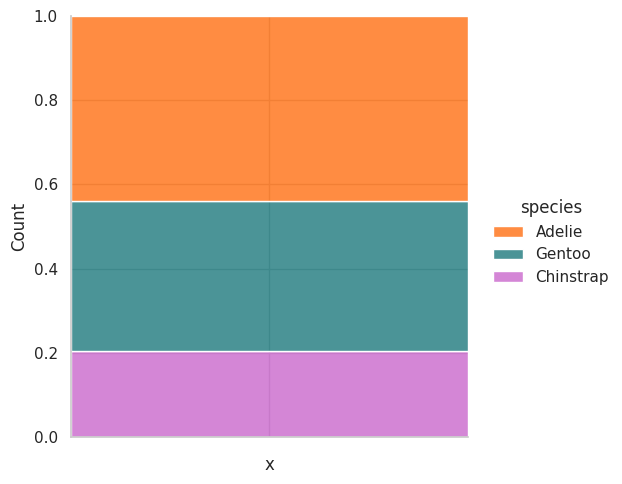

In [26]:
df_preprocess_penguins.add_column('x','').pipe(lambda df: sns.displot(data=df,x='x',hue='species',multiple='fill',palette=penguin_color ))

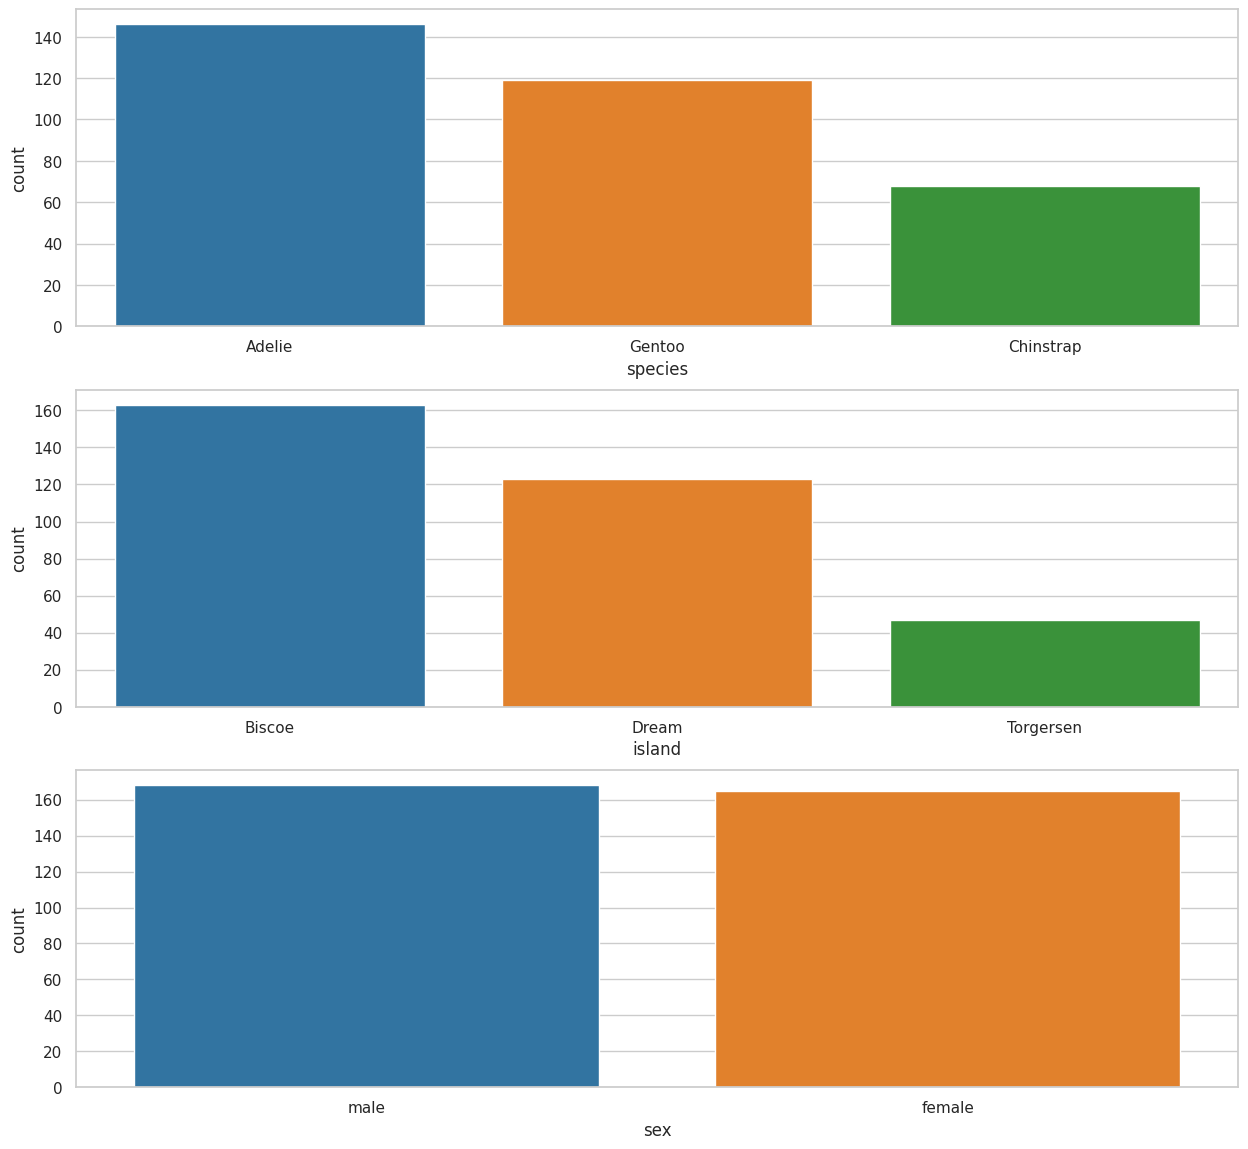

In [27]:
df_obj=df_preprocess_penguins.select_dtypes('object').columns
fig,ax=plt.subplots(3,1,figsize=(15,14))


for i in range(len(df_obj)):
    df_preprocess_penguins.value_counts(df_obj[i],sort=True).reset_index(name='count').pipe( lambda df :sns.barplot(ax=ax[i],data=df,x=df_obj[i],y='count'))



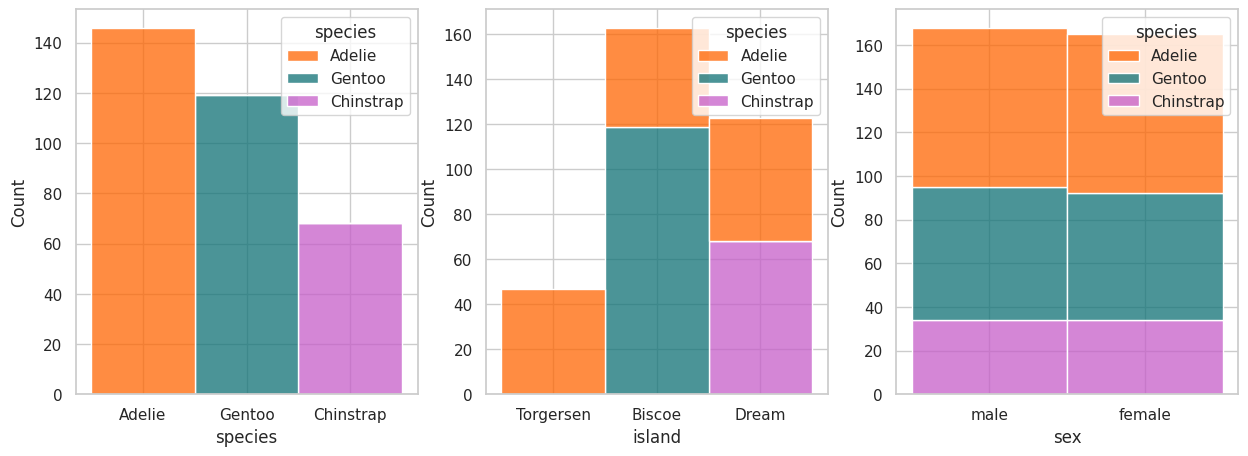

In [28]:

df_obj=df_preprocess_penguins.select_dtypes('object').columns
fig,ax=plt.subplots(1,3,figsize=(15,5))
for i in range(len(df_obj)):
    df_preprocess_penguins.pipe( lambda df :sns.histplot(ax=ax[i],data=df,x=df[df_obj[i]],hue='species',multiple='stack',palette=penguin_color))



# Medidas de tendencia central

## Media o promedio

In [29]:
df_preprocess_penguins.bill_depth_mm.mean()

17.164864864864867

In [30]:
np.mean(df_preprocess_penguins.bill_depth_mm)

17.164864864864867

In [31]:
df_preprocess_penguins.mean()

/tmp/ipykernel_139/3100866407.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocess_penguins.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [32]:
df_preprocess_penguins.median()

/tmp/ipykernel_139/1917194665.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocess_penguins.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [33]:
df_preprocess_penguins.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

In [34]:
df_preprocess_penguins.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [35]:
df_preprocess_penguins.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [36]:
df_preprocess_penguins.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [37]:
df_preprocess_penguins.max(numeric_only=True)-df_preprocess_penguins.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [38]:
df_preprocess_penguins.std()


/tmp/ipykernel_139/3917180804.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocess_penguins.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [39]:
df_preprocess_penguins.mean()-df_preprocess_penguins.std() #63% de datos



/tmp/ipykernel_139/282048878.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocess_penguins.mean()-df_preprocess_penguins.std() #63% de datos
/tmp/ipykernel_139/282048878.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocess_penguins.mean()-df_preprocess_penguins.std() #63% de datos


bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [40]:
df_preprocess_penguins.quantile(0.75)

/tmp/ipykernel_139/1991999952.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocess_penguins.quantile(0.75)


bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [41]:
df_preprocess_penguins.quantile(0.25)

/tmp/ipykernel_139/1300751753.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocess_penguins.quantile(0.25)


bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [42]:
df_preprocess_penguins.quantile(0.75)-df_preprocess_penguins.quantile(0.25)#rango intercualtilico

/tmp/ipykernel_139/1789224737.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocess_penguins.quantile(0.75)-df_preprocess_penguins.quantile(0.25)#rango intercualtilico


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [43]:
df_preprocess_penguins.quantile(q=[0.75,0.5,0.25]).transpose().rename_axis('variable').reset_index().assign(iqr=lambda df: df[0.75]-df[0.25])

/tmp/ipykernel_139/2268383574.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocess_penguins.quantile(q=[0.75,0.5,0.25]).transpose().rename_axis('variable').reset_index().assign(iqr=lambda df: df[0.75]-df[0.25])


variable    0.75     0.5    0.25     iqr
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0
4               year  2009.0  2008.0  2007.0     2.0

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

Text(213.5, 17.5, 'Q(75%)')

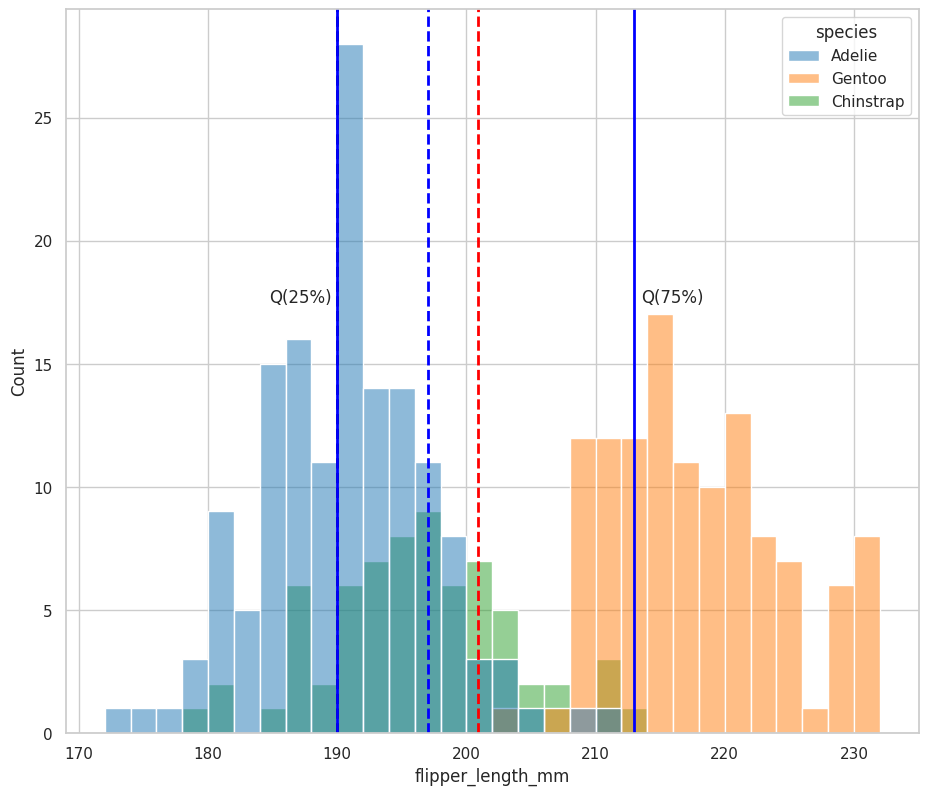

In [44]:
sns.histplot(data=df_preprocess_penguins,x='flipper_length_mm',hue='species',binwidth=2)

plt.axvline(x=preprocess_penguins.flipper_length_mm.mean(),color='red',linestyle='dashed',linewidth=2)
plt.axvline(x=preprocess_penguins.flipper_length_mm.median(),color='blue',linestyle='dashed',linewidth=2)
plt.axvline(x=preprocess_penguins.flipper_length_mm.mode().max(),color='black',linestyle='dashed',linewidth=2)
plt.axvline(x=preprocess_penguins.flipper_length_mm.quantile(0.25),color='blue',linewidth=2)
plt.axvline(x=preprocess_penguins.flipper_length_mm.quantile(0.75),color='blue',linewidth=2)
plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)


### Diagrama de caja / boxplot

<AxesSubplot: xlabel='flipper_length_mm'>

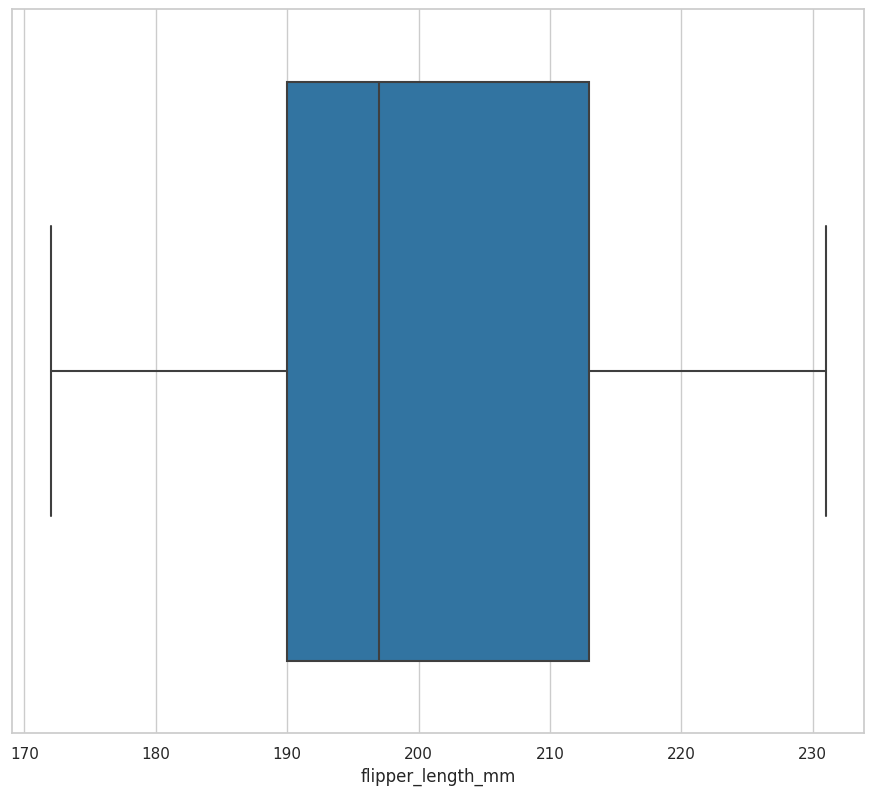

In [45]:
sns.boxplot(data=df_preprocess_penguins,x='flipper_length_mm')

### Limitaciones

In [46]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:  #binwith opimo
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

In [47]:
freedman_diaconis_bindwidth(df_preprocess_penguins.flipper_length_mm)

6.636560948202412

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

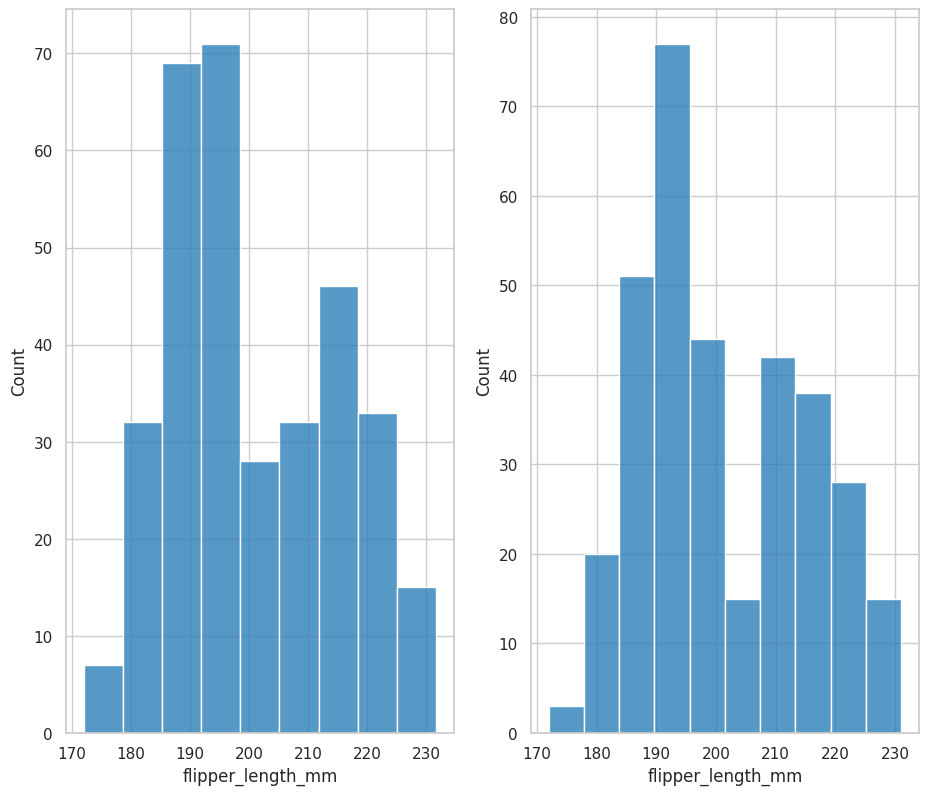

In [48]:
fig,ax = plt.subplots(1,2)
sns.histplot(ax=ax[0],data=df_preprocess_penguins,x='flipper_length_mm',binwidth=6.63)
sns.histplot(ax=ax[1],data=df_preprocess_penguins,x='flipper_length_mm')

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

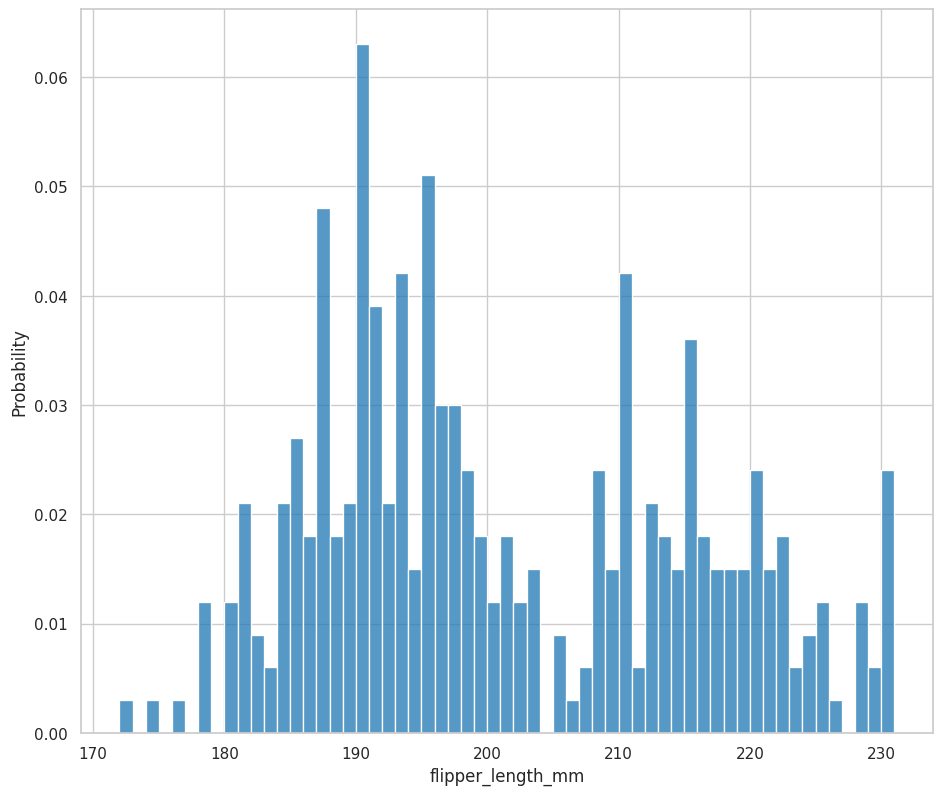

In [49]:
sns.histplot(data=df_preprocess_penguins,x='flipper_length_mm',binwidth=1,stat='probability')

### Utilizando `empiricaldist`

In [50]:
pmf_Flipper_Length_mm=empiricaldist.Pmf.from_seq(df_preprocess_penguins.flipper_length_mm,normalize=True)
pmf_Flipper_Length_mm


172.0    0.003003
174.0    0.003003
176.0    0.003003
178.0    0.012012
180.0    0.012012
181.0    0.021021
182.0    0.009009
183.0    0.006006
184.0    0.021021
185.0    0.027027
186.0    0.018018
187.0    0.048048
188.0    0.018018
189.0    0.021021
190.0    0.063063
191.0    0.039039
192.0    0.021021
193.0    0.042042
194.0    0.015015
195.0    0.051051
196.0    0.030030
197.0    0.030030
198.0    0.024024
199.0    0.018018
200.0    0.012012
201.0    0.018018
202.0    0.012012
203.0    0.015015
205.0    0.009009
206.0    0.003003
207.0    0.006006
208.0    0.024024
209.0    0.015015
210.0    0.042042
211.0    0.006006
212.0    0.021021
213.0    0.018018
214.0    0.015015
215.0    0.036036
216.0    0.018018
217.0    0.015015
218.0    0.015015
219.0    0.015015
220.0    0.024024
221.0    0.015015
222.0    0.018018
223.0    0.006006
224.0    0.009009
225.0    0.012012
226.0    0.003003
228.0    0.012012
229.0    0.006006
230.0    0.021021
231.0    0.003003
Name: , dtype: float64

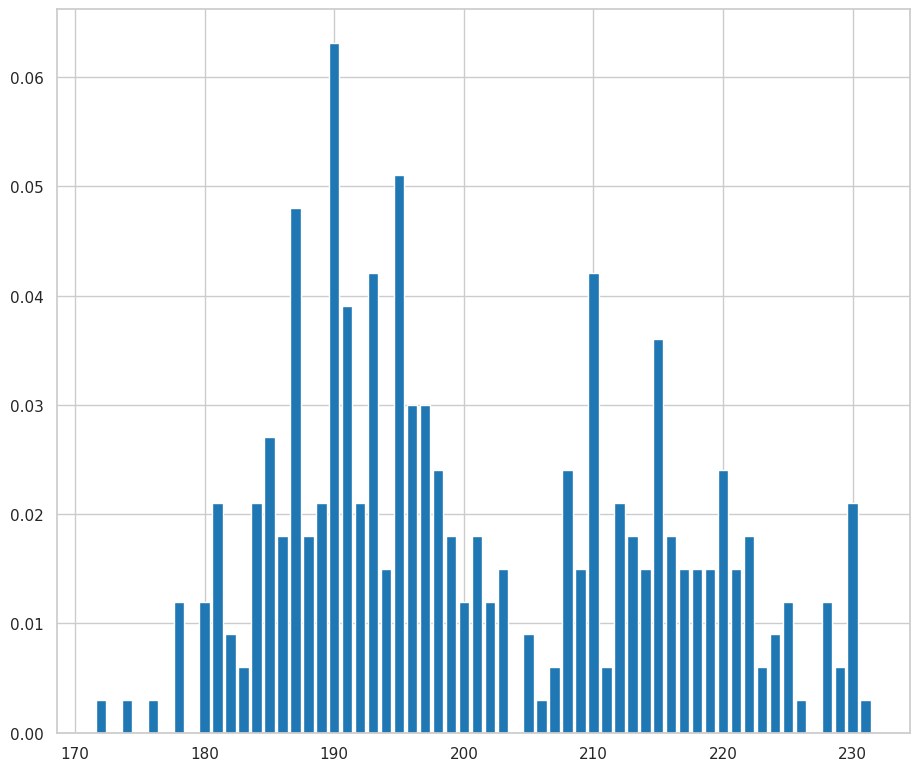

In [51]:
pmf_Flipper_Length_mm.bar()

In [52]:
pmf_Flipper_Length_mm(190)#probabilidad de que se encuentre un pinguino con esa caracteristica

0.06306306306306306

In [53]:
df_preprocess_penguins.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

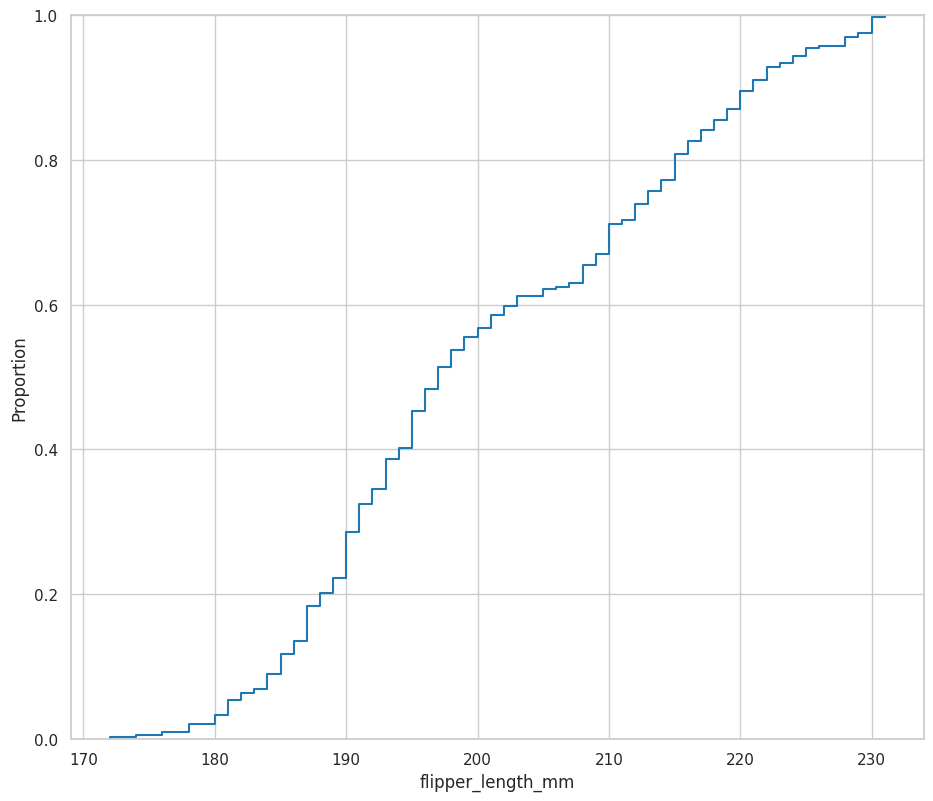

In [54]:
sns.ecdfplot(data=df_preprocess_penguins,x='flipper_length_mm')

### Utilizando `empiricaldist`

In [55]:
cdf_flipper=empiricaldist.Cdf.from_seq(df_preprocess_penguins.flipper_length_mm,normalize=True)

200 0.5675675675675675


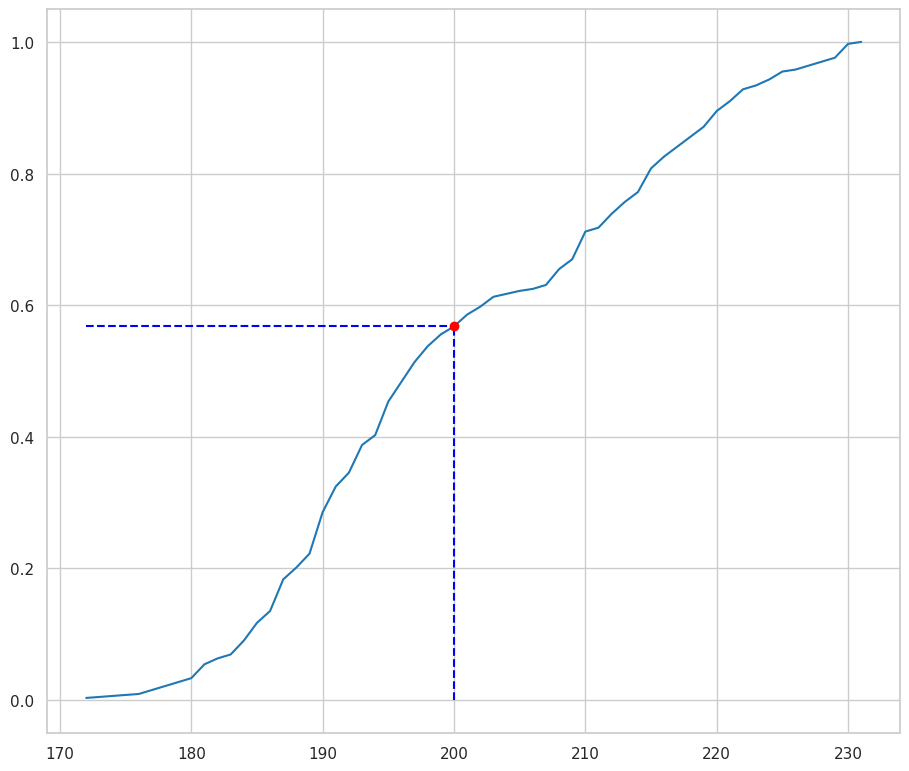

In [56]:
cdf_flipper.plot()
p=200
q=cdf_flipper.forward(p)
print(p,q)

plt.vlines(x=p,ymax=q,ymin=0,color='b',linestyle='dashed')

plt.hlines(y=q,xmax=p,xmin=df_preprocess_penguins.flipper_length_mm.min(),color='b',linestyle='dashed')
plt.plot(p,q,'ro')

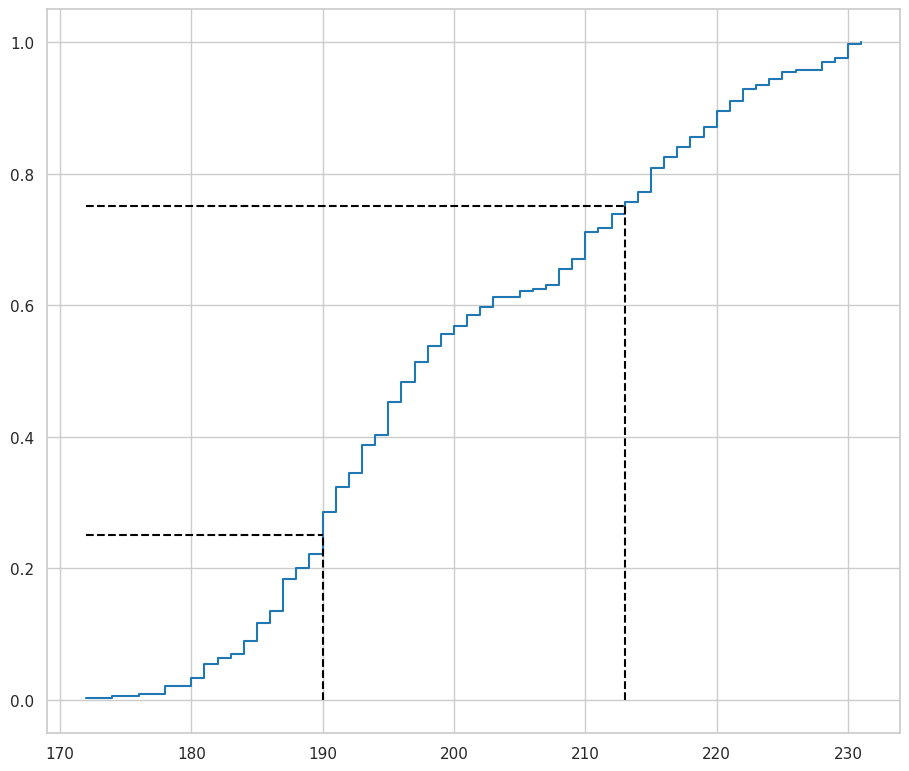

In [57]:
cdf_flipper.step()

#quartiles

ps=(0.25,0.75)
res=cdf_flipper.inverse(ps)
plt.vlines(x=res,ymax=ps,ymin=0,color='black',linestyle='dashed')
plt.hlines(y=ps,xmax=res,xmin=pmf_Flipper_Length_mm.qs[0],color='black',linestyle='dashed')

In [58]:
print(cdf_flipper.quantile(0.75),cdf_flipper.quantile(0.25))


213.0 190.0


### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

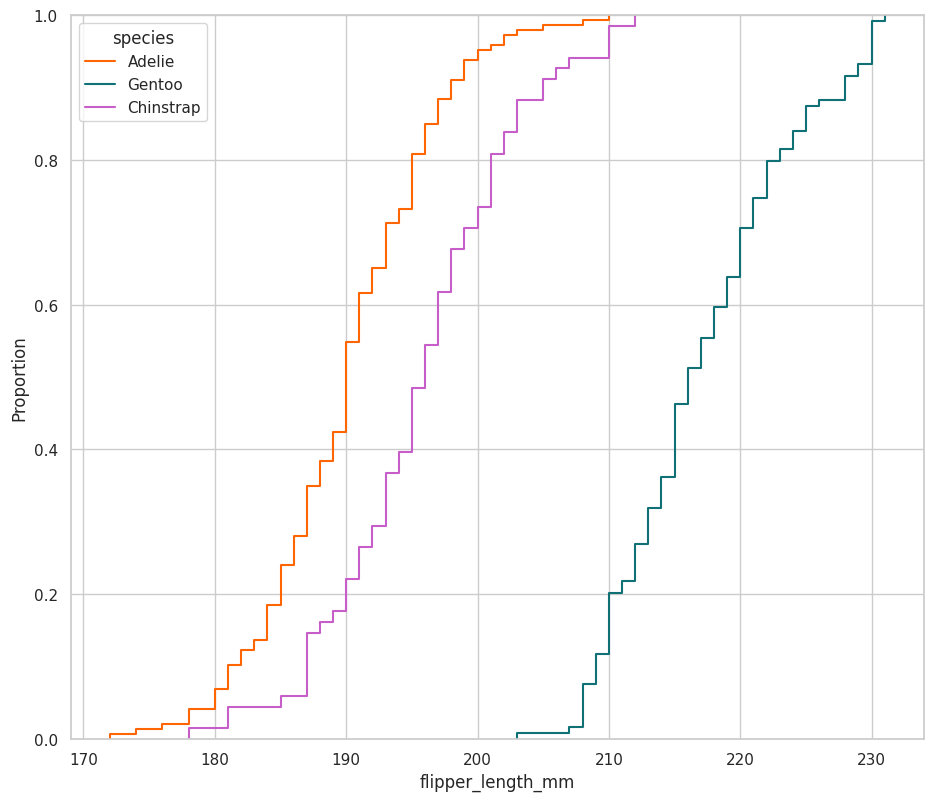

In [59]:
sns.ecdfplot(data=df_preprocess_penguins,x='flipper_length_mm',hue='species',palette=penguin_color)

## Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

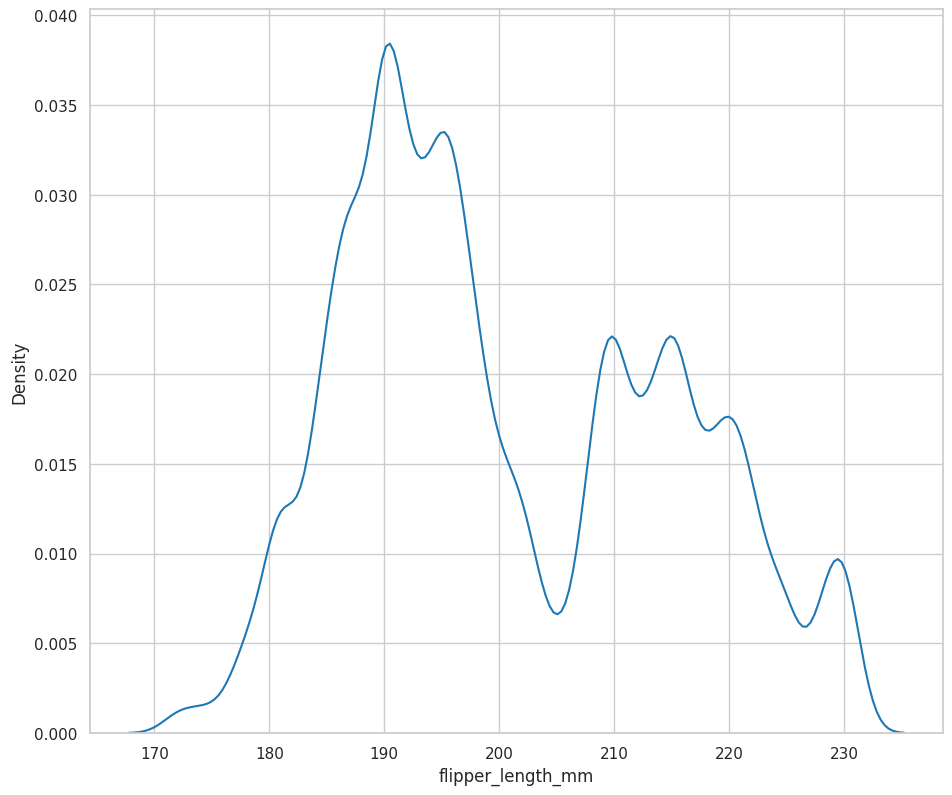

In [60]:
sns.kdeplot(data=df_preprocess_penguins,x='flipper_length_mm',bw_method=0.1)

In [61]:
stats = df_preprocess_penguins.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot: >

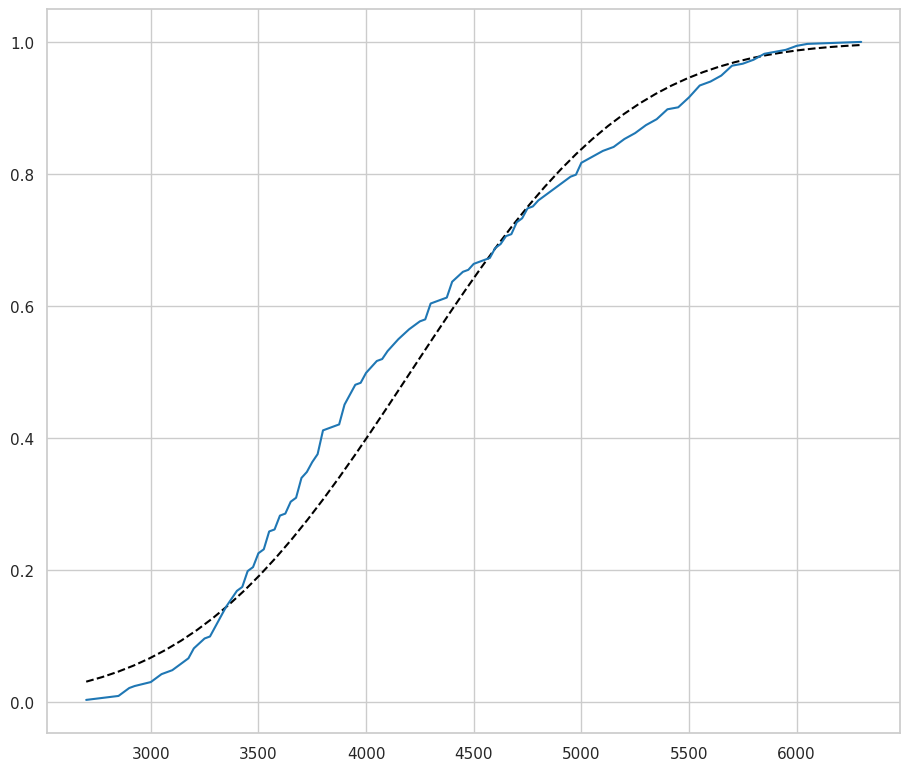

In [62]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)

plt.plot(xs,ys,color='black',linestyle='dashed')

empiricaldist.Cdf.from_seq(df_preprocess_penguins.body_mass_g,normalize=True).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

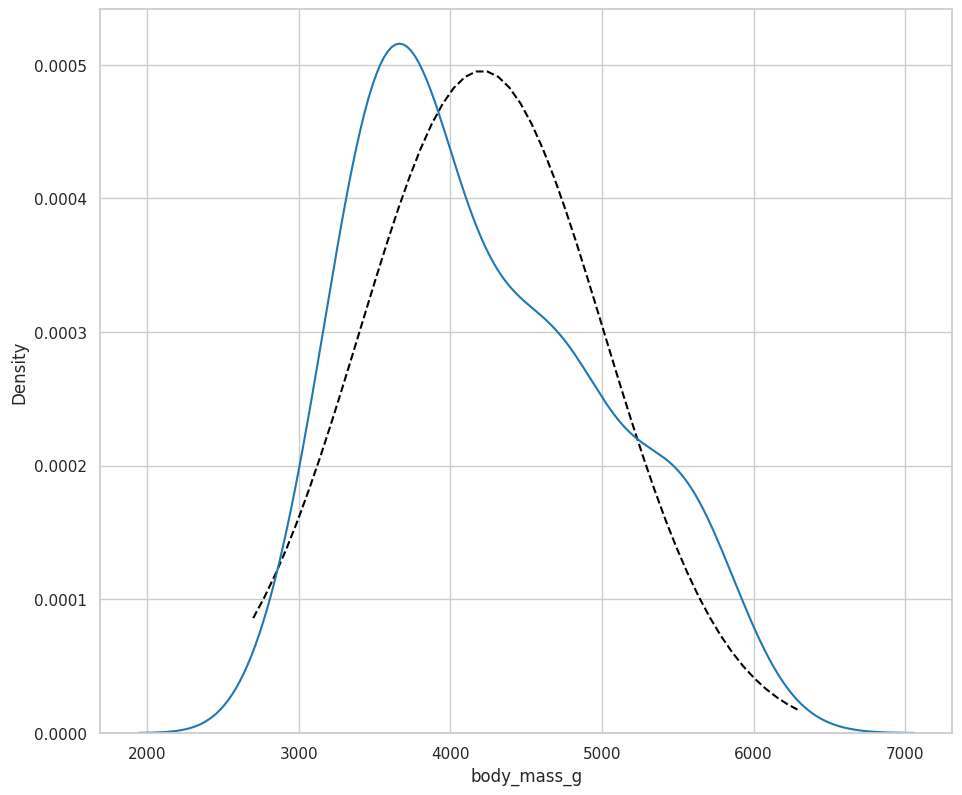

In [63]:
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)

plt.plot(xs,ys,color='black',linestyle='dashed')

sns.kdeplot(data=df_preprocess_penguins,x='body_mass_g') #sesgada a la izquierda

<AxesSubplot: xlabel='bill_length_mm', ylabel='Density'>

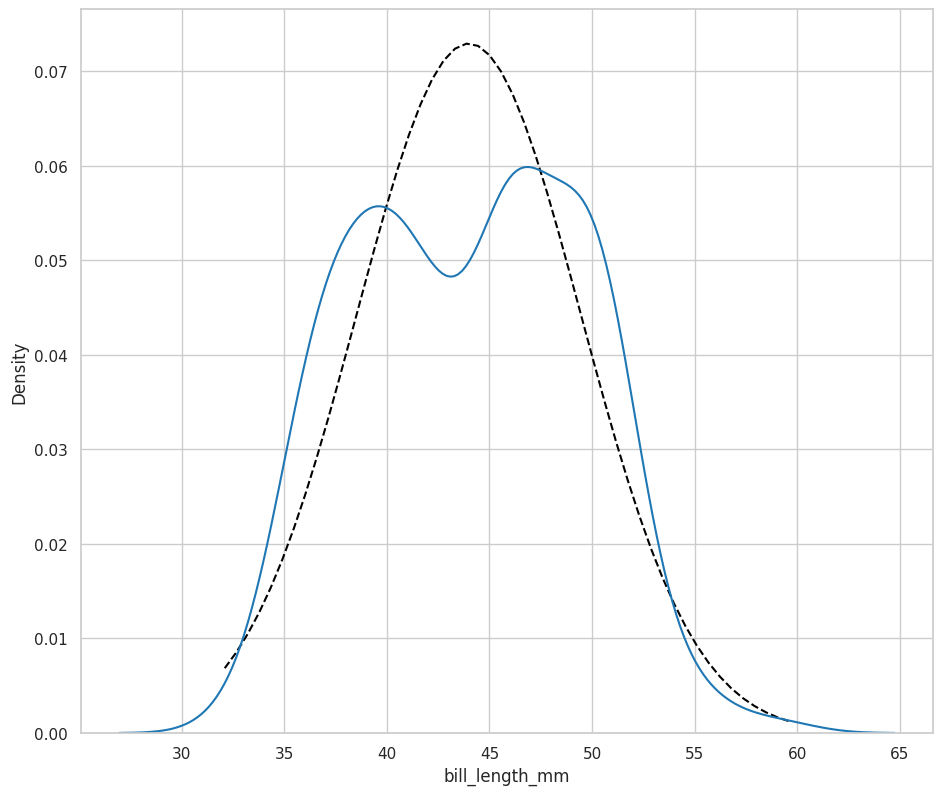

In [64]:
stats=df_preprocess_penguins.bill_length_mm.describe()
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)

plt.plot(xs,ys,color='black',linestyle='dashed')

sns.kdeplot(data=df_preprocess_penguins,x='bill_length_mm') #sesgada a la izquierda

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

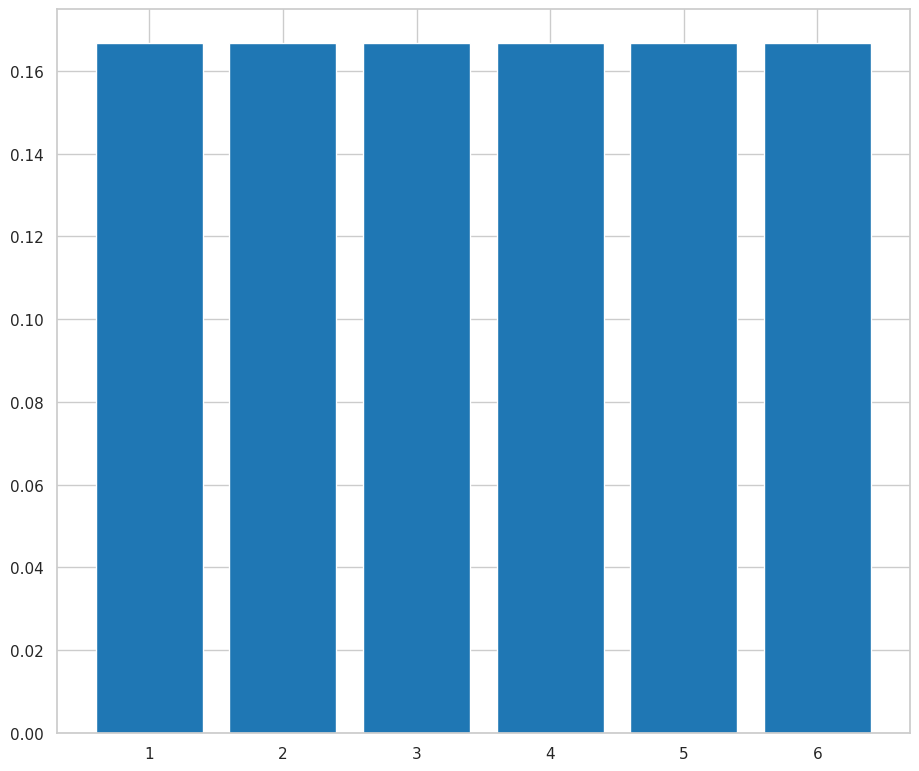

In [65]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

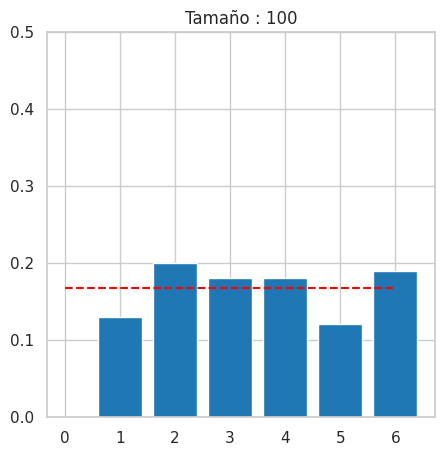

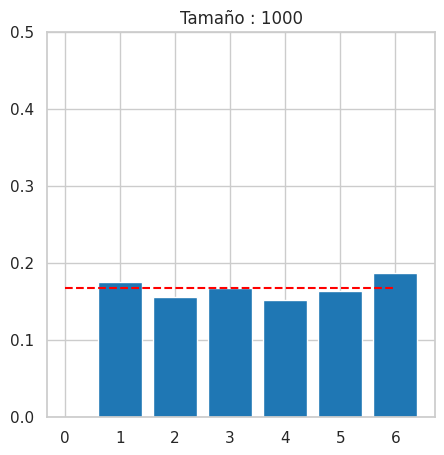

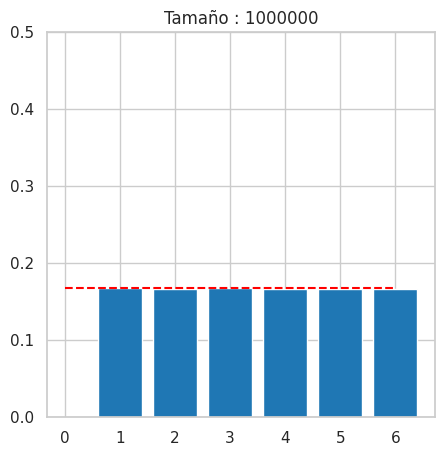

In [66]:
for sample_size in (1e2,1e3,1e6):
    sample_size= int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf=empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.hlines(y=1/6,xmin=0,xmax=6,color='red',linestyle='dashed')
    plt.ylim([0,0.5])
    plt.title(f"Tamaño : {sample_size}")

## Teorema del Límite Central

In [67]:
df_preprocess_penguins.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [68]:
sex_numeric = df_preprocess_penguins.sex.replace(['male','female'],[1,0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [69]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

/tmp/ipykernel_139/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_139/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_139/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

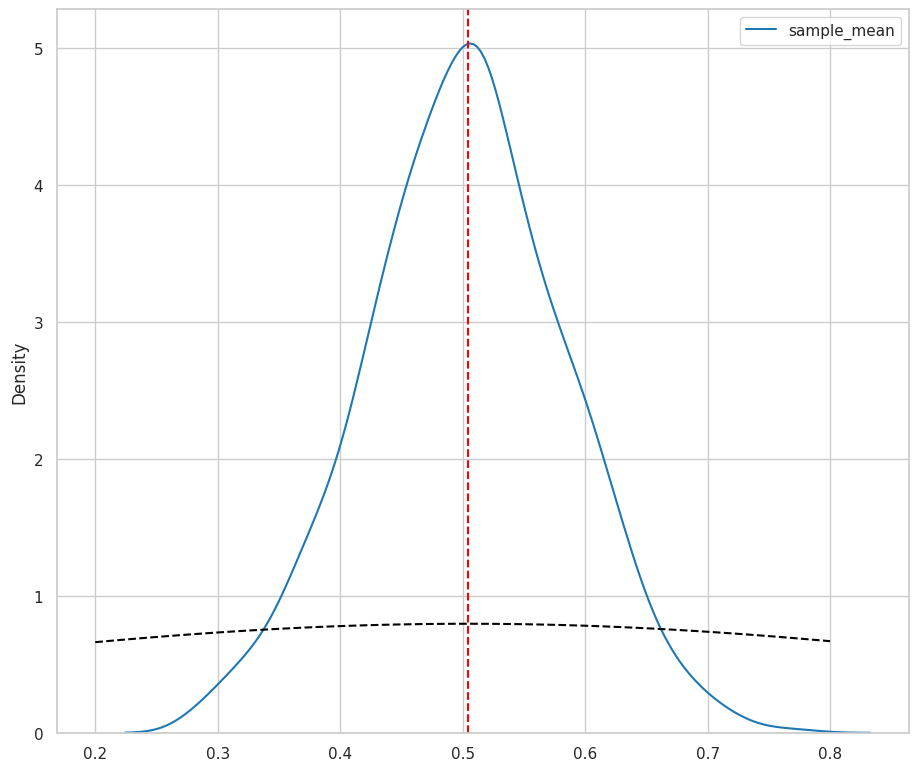

In [70]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

xs=np.linspace(0.2,0.8)
ys=scipy.stats.norm(sex_numeric.mean(),sex_numeric.std()).pdf(xs)

plt.plot(xs,ys,color='black',linestyle='dashed')

In [71]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

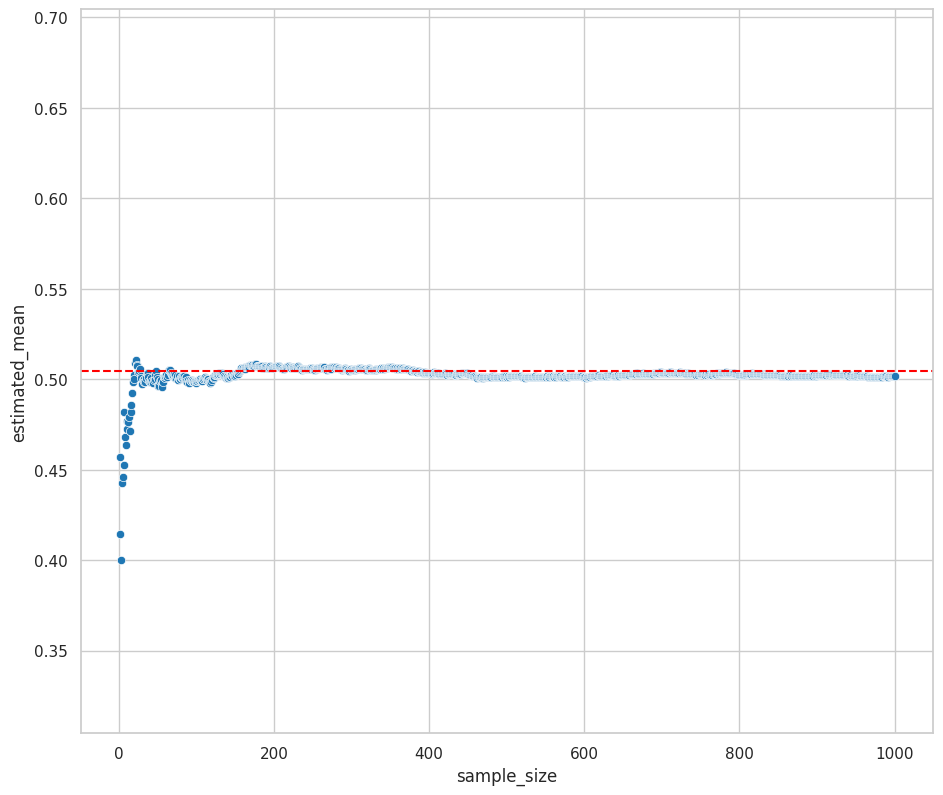

In [72]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones: Gráfica de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

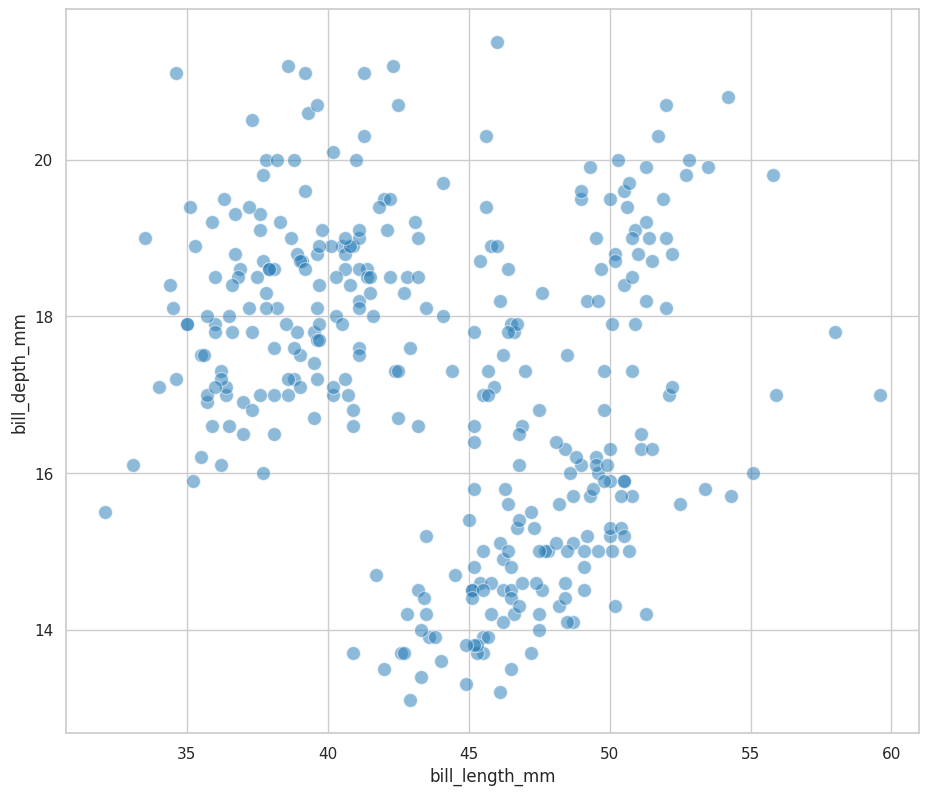

In [73]:
sns.scatterplot(data=df_preprocess_penguins,x='bill_length_mm',y='bill_depth_mm',alpha=1/2,s=100)

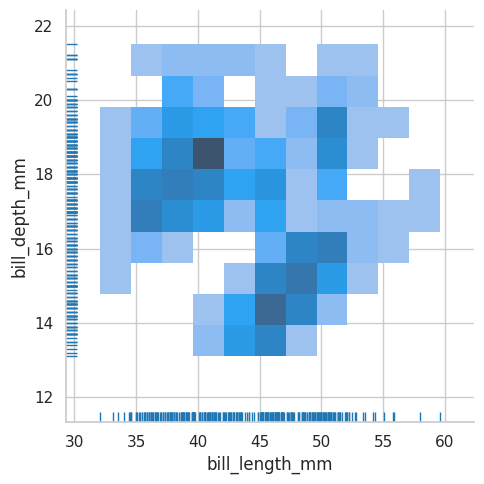

In [74]:
sns.displot(data=df_preprocess_penguins,x='bill_length_mm',y='bill_depth_mm',rug=True)

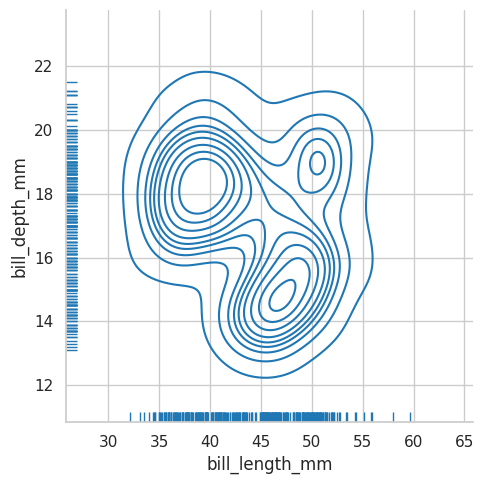

In [75]:
sns.displot(data=df_preprocess_penguins,x='bill_length_mm',y='bill_depth_mm',rug=True,kind='kde')

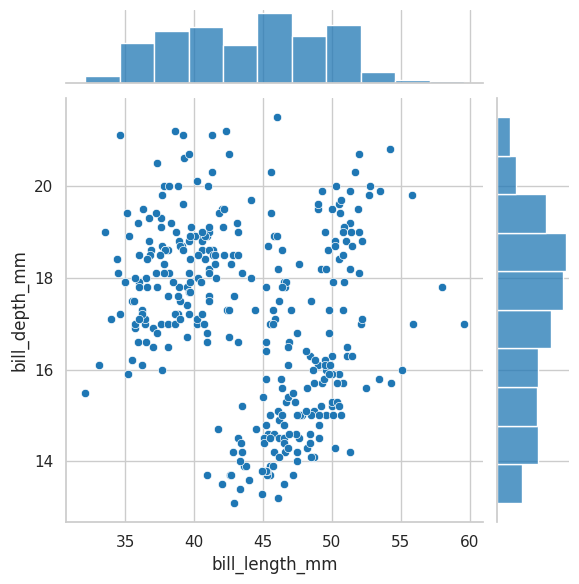

In [76]:
sns.jointplot(data=df_preprocess_penguins,x='bill_length_mm',y='bill_depth_mm')

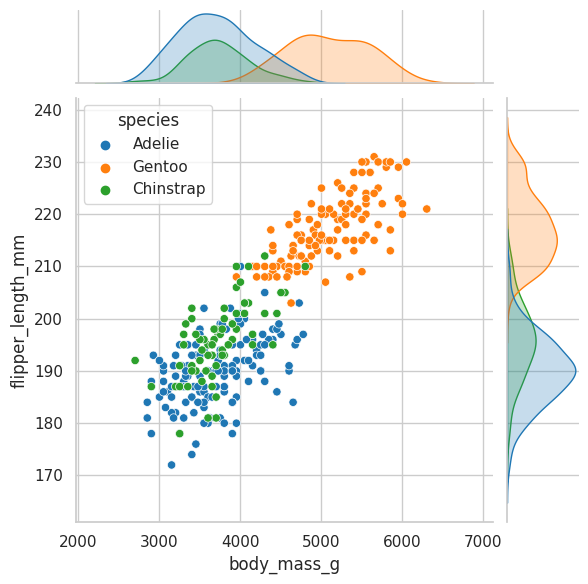

In [77]:
sns.jointplot(data=df_preprocess_penguins,x='body_mass_g',y='flipper_length_mm',hue='species')

# Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

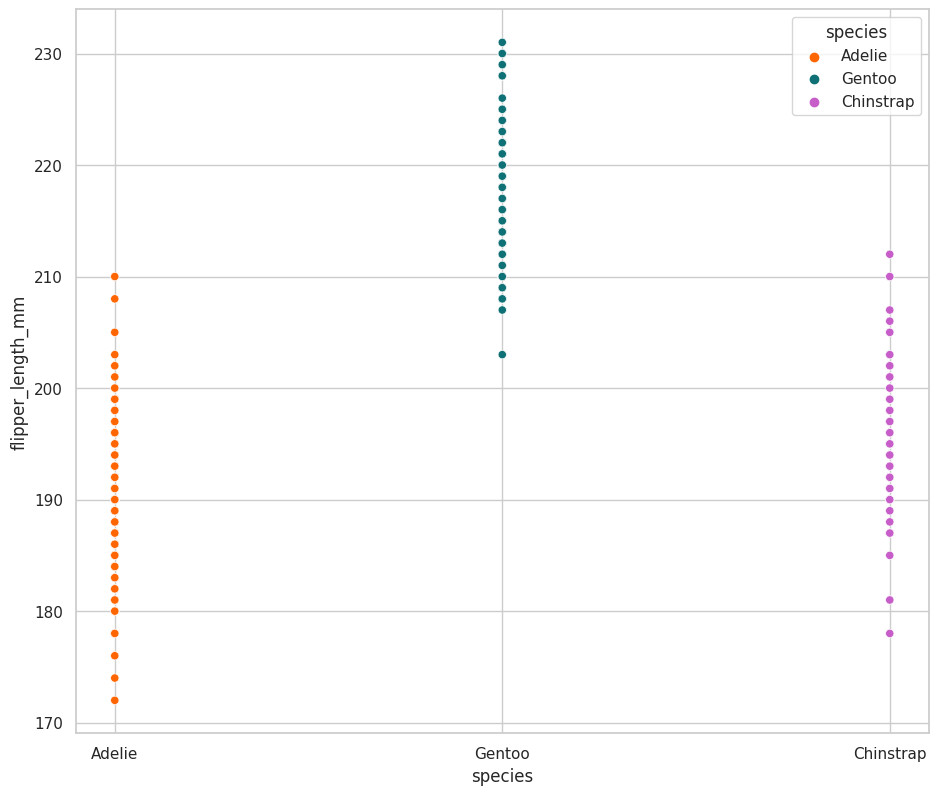

In [78]:
sns.scatterplot(data=df_preprocess_penguins,x='species',y='flipper_length_mm',hue='species',palette=penguin_color)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

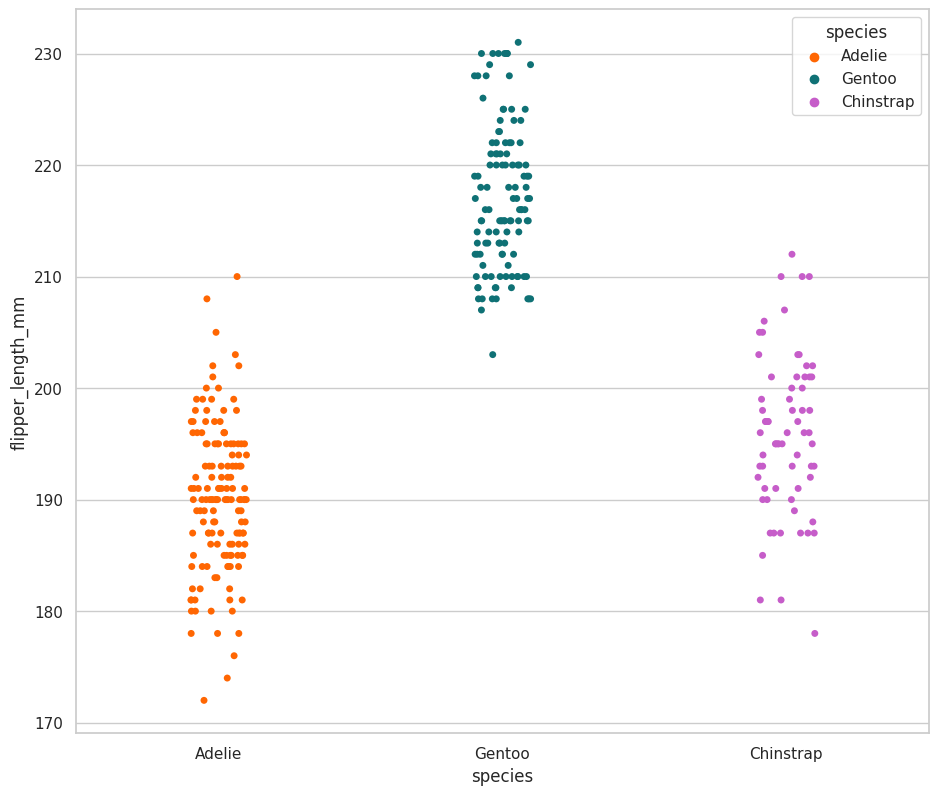

In [79]:
sns.stripplot(data=df_preprocess_penguins,x='species',y='flipper_length_mm',hue='species',palette=penguin_color)

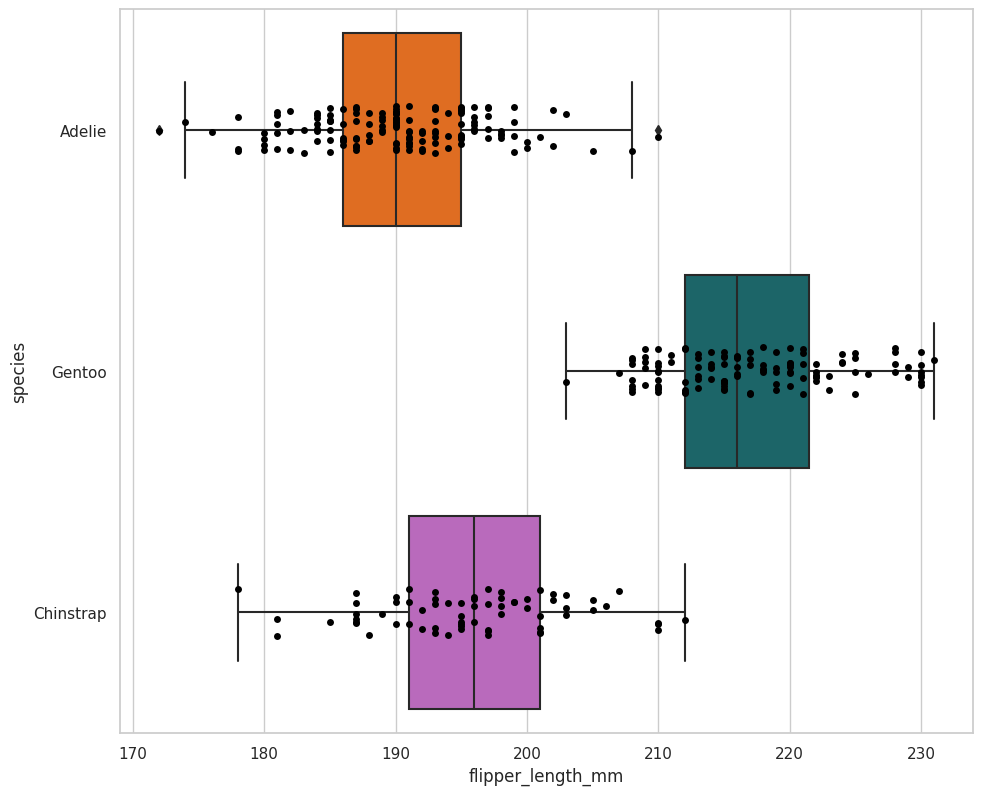

In [80]:
ax=sns.boxplot(data=df_preprocess_penguins,y='species',x='flipper_length_mm',palette=penguin_color)
ax=sns.stripplot(data=df_preprocess_penguins,y='species',x='flipper_length_mm',color='black')

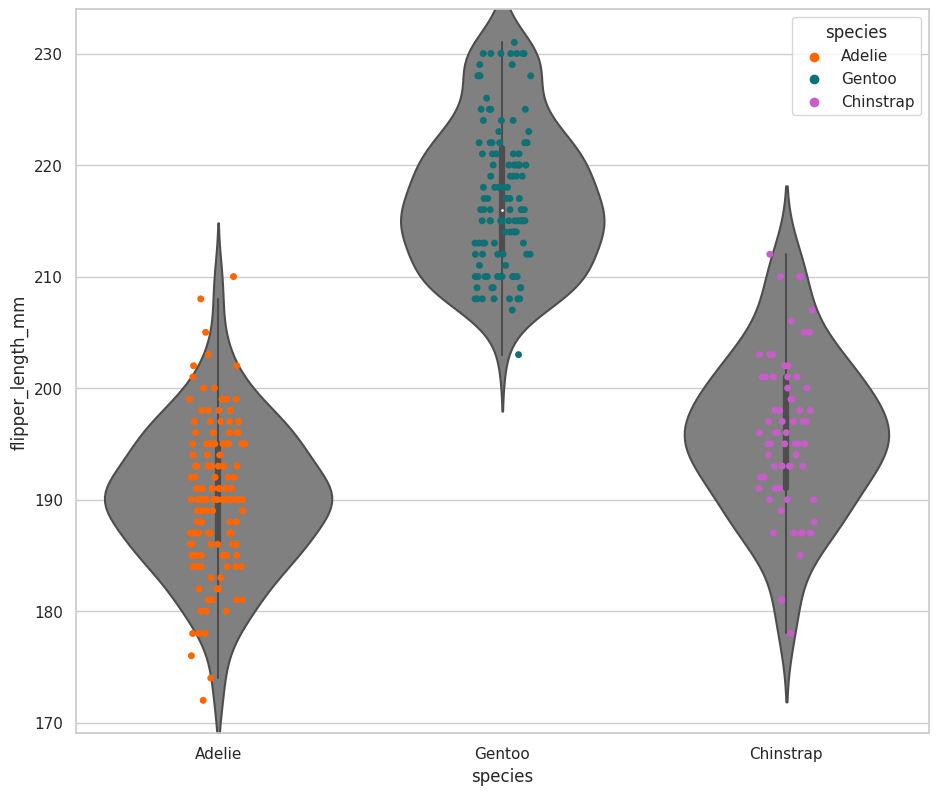

In [81]:
ax= sns.violinplot(data=df_preprocess_penguins,x='species',y='flipper_length_mm',color='gray')
ax= sns.stripplot(data=df_preprocess_penguins,x='species',y='flipper_length_mm',hue='species',palette=penguin_color)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

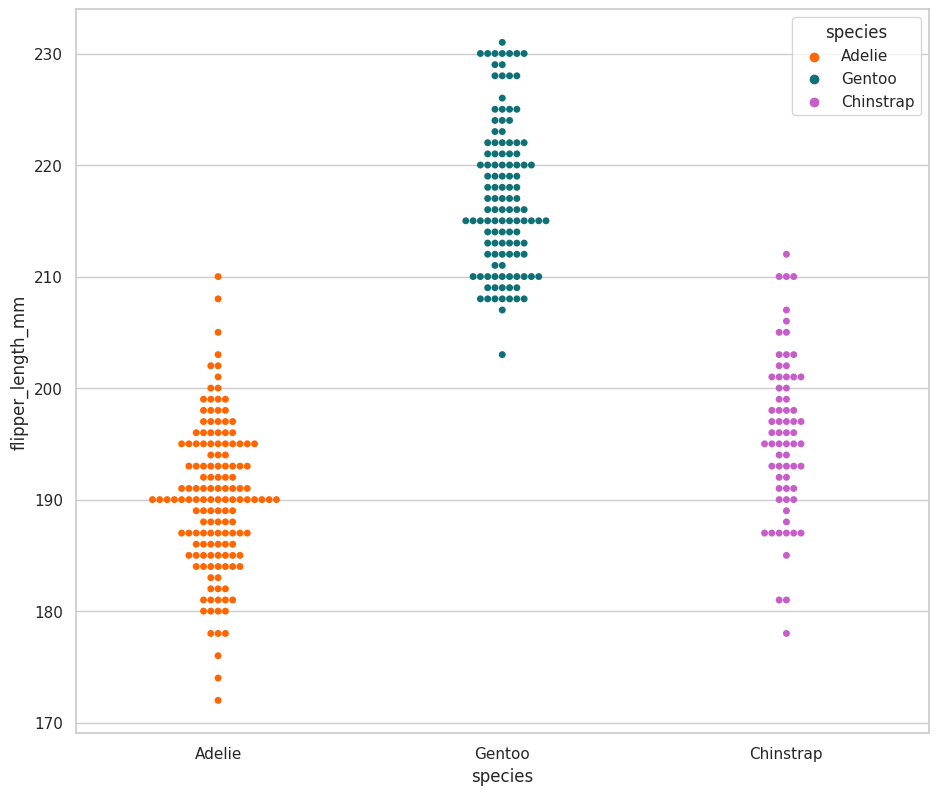

In [82]:
sns.swarmplot(data=df_preprocess_penguins,x='species',y='flipper_length_mm',hue='species',palette=penguin_color)

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

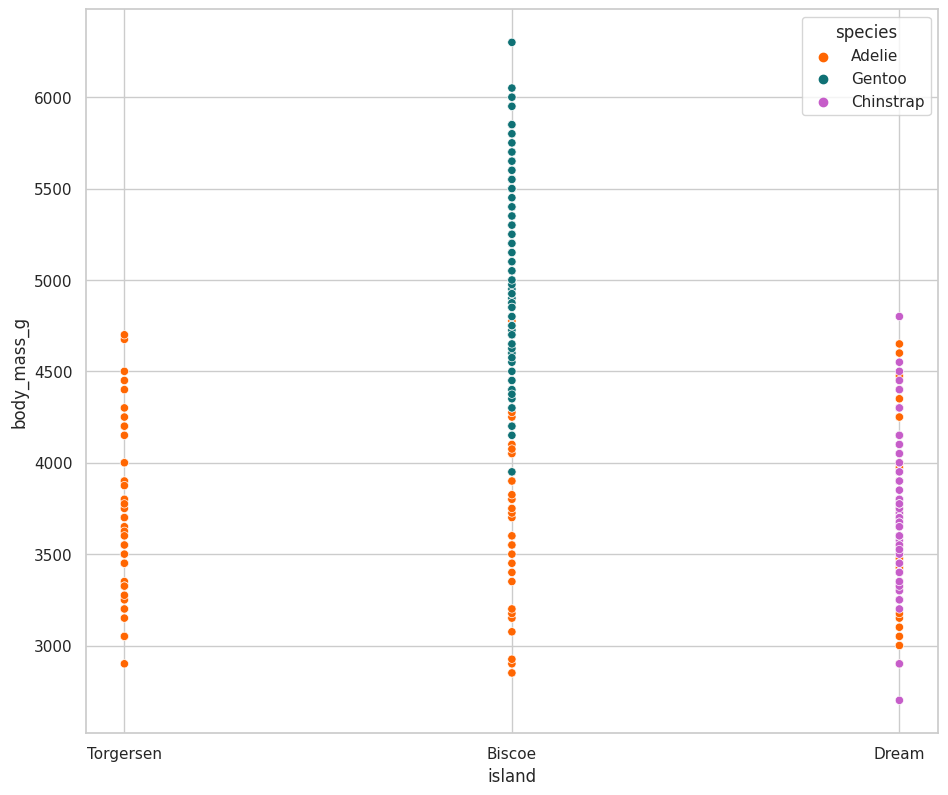

In [83]:
sns.scatterplot(data=df_preprocess_penguins,x='island',y='body_mass_g',hue='species',palette=penguin_color)

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

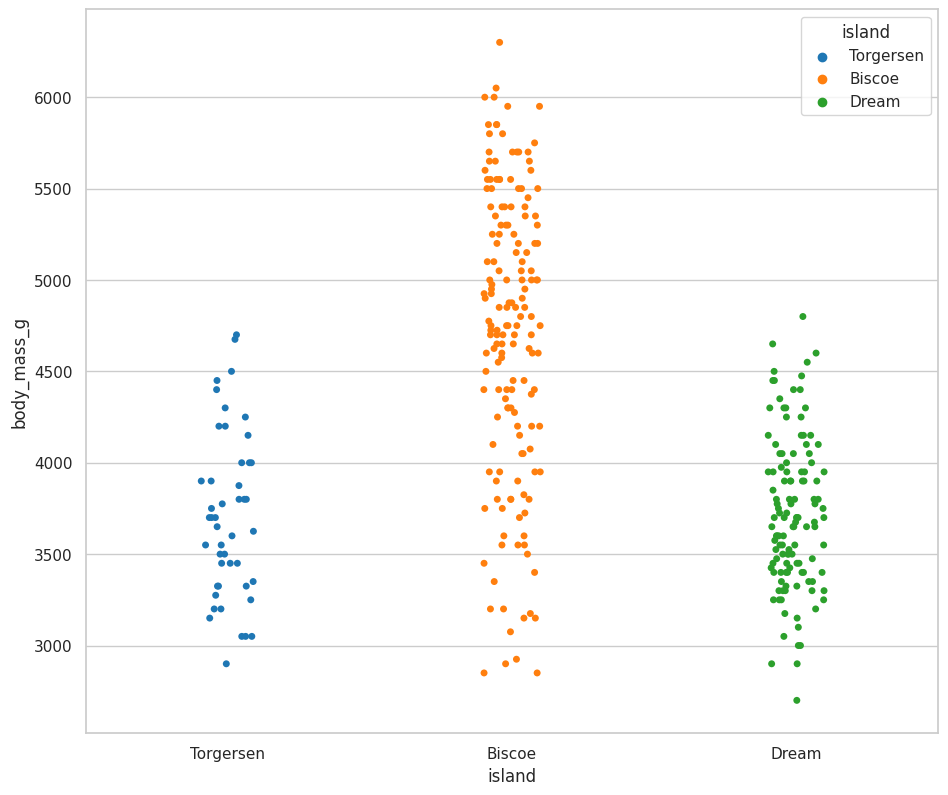

In [84]:
sns.stripplot(data=df_preprocess_penguins,x='island',y='body_mass_g',hue='island')

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

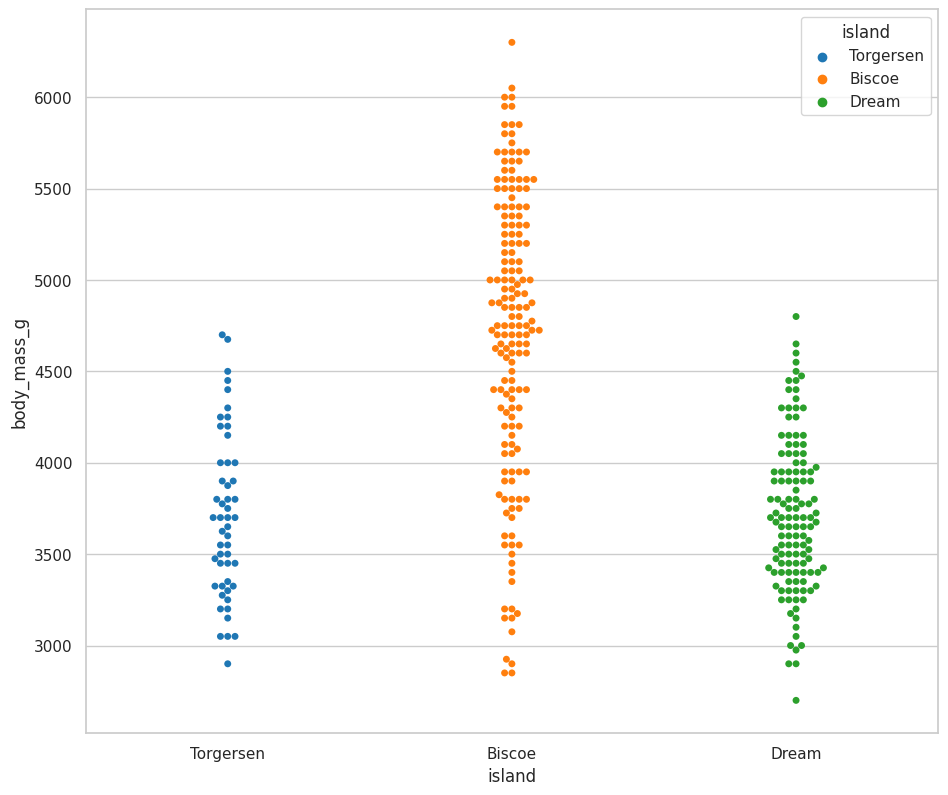

In [85]:
sns.swarmplot(data=df_preprocess_data,x='island',y='body_mass_g',hue='island')

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [86]:
df_preprocess_penguins.corr()

/tmp/ipykernel_139/1062941588.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocess_penguins.corr()


bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
year                     0.032657      -0.048182           0.151068   

                   body_mass_g      year  
bill_length_mm        0.589451  0.032657  
bill_depth_mm        -0.472016 -0.048182  
flipper_length_mm     0.872979  0.151068  
body_mass_g           1.000000  0.021862  
year                  0.021862  1.000000

## ¿Cómo puedo visualizar los coeficientes de correlación?

/tmp/ipykernel_139/1014360636.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_preprocess_penguins.corr(),cmap=sns.diverging_palette(20,230,as_cmap=True),center=0,vmin=-1,vmax=1,linewidths=0.5,annot=True)


<AxesSubplot: >

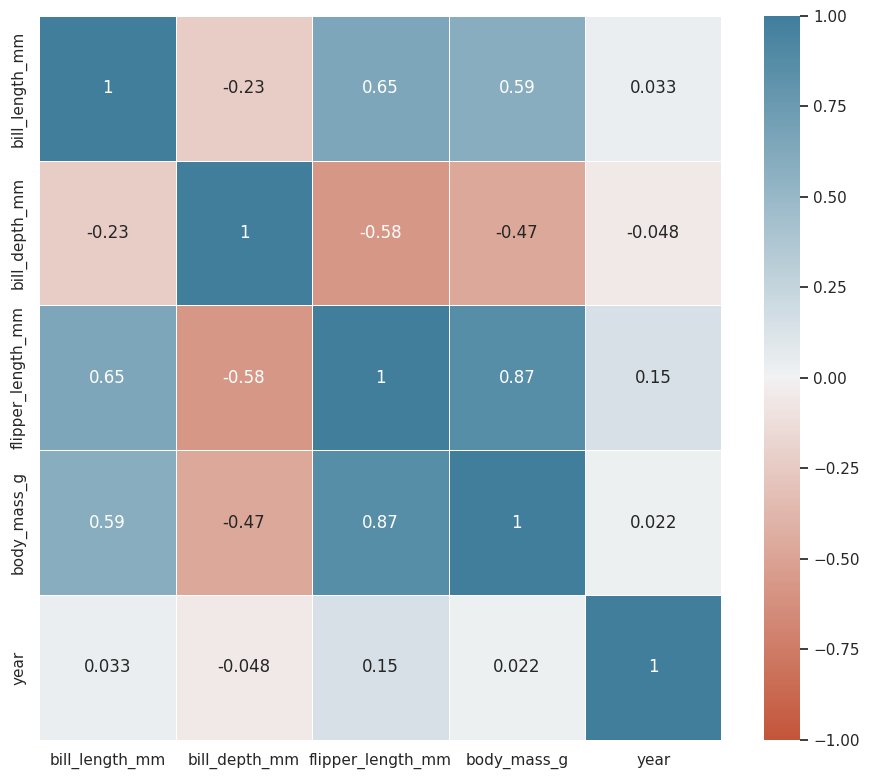

In [87]:
sns.heatmap(data=df_preprocess_penguins.corr(),cmap=sns.diverging_palette(20,230,as_cmap=True),center=0,vmin=-1,vmax=1,linewidths=0.5,annot=True)

/tmp/ipykernel_139/4011574042.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=df_preprocess_penguins.corr(),cmap=sns.diverging_palette(20,230,as_cmap=True),center=0,vmin=-1,vmax=1,linewidths=0.5,annot=True)


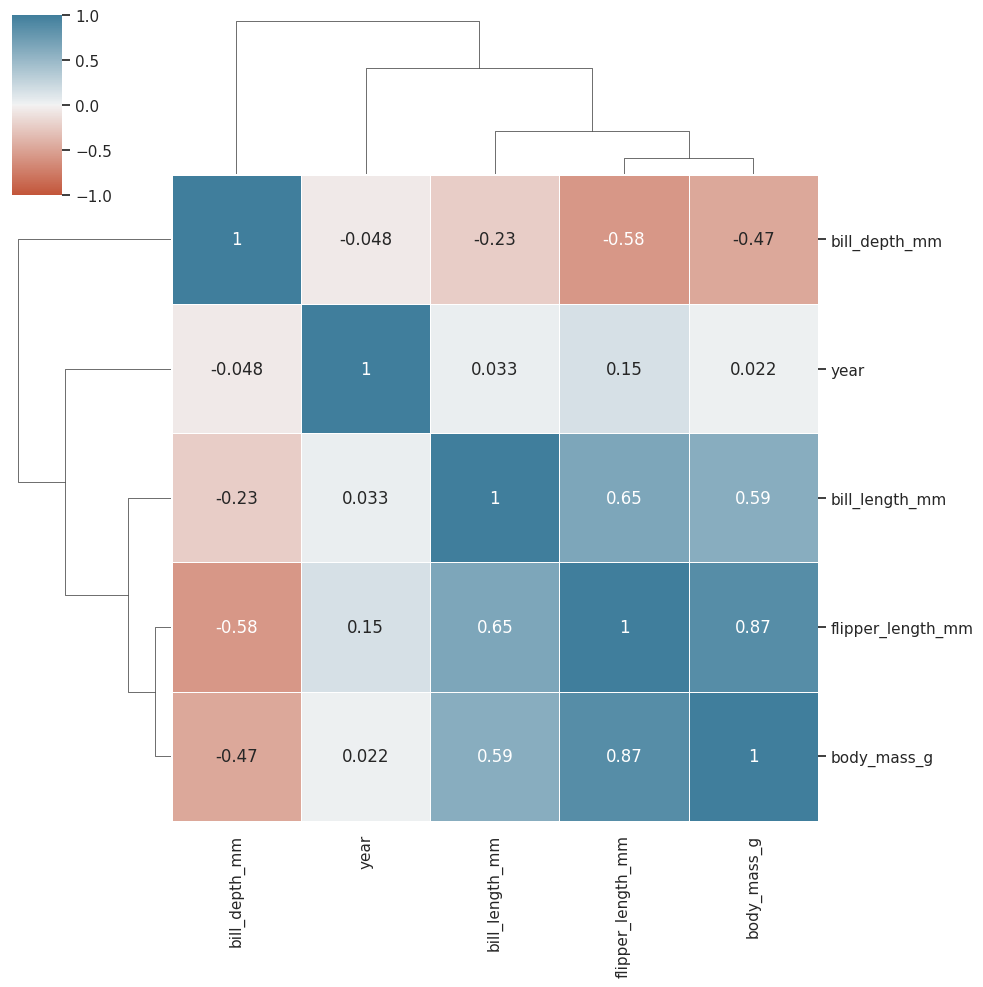

In [88]:
sns.clustermap(data=df_preprocess_penguins.corr(),cmap=sns.diverging_palette(20,230,as_cmap=True),center=0,vmin=-1,vmax=1,linewidths=0.5,annot=True)

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [89]:
df_preprocess_penguins= df_preprocess_penguins.assign(numeric_sex=lambda df: df.sex.replace(['female','male'],[0,1]))

/tmp/ipykernel_139/4011574042.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=df_preprocess_penguins.corr(),cmap=sns.diverging_palette(20,230,as_cmap=True),center=0,vmin=-1,vmax=1,linewidths=0.5,annot=True)


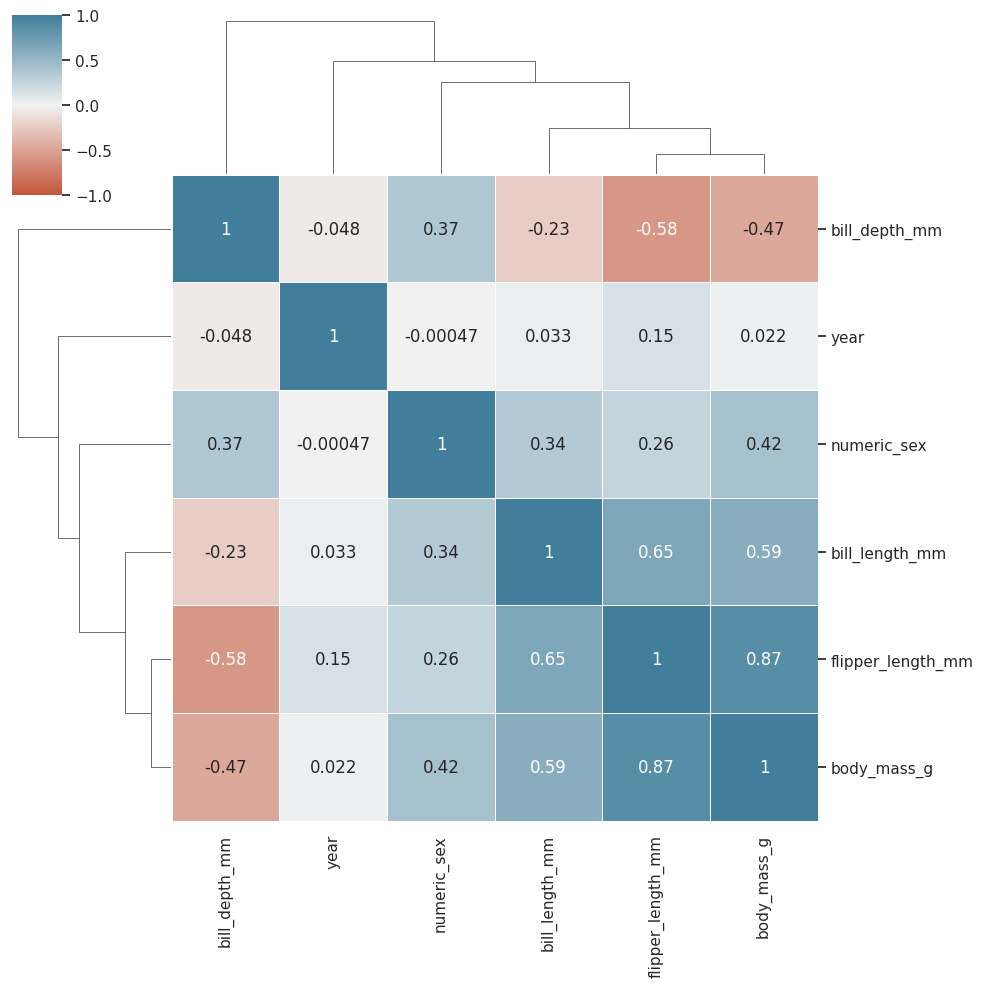

In [90]:
sns.clustermap(data=df_preprocess_penguins.corr(),cmap=sns.diverging_palette(20,230,as_cmap=True),center=0,vmin=-1,vmax=1,linewidths=0.5,annot=True)

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

array([[ 1.        , -0.07336699],
       [-0.07336699,  1.        ]])

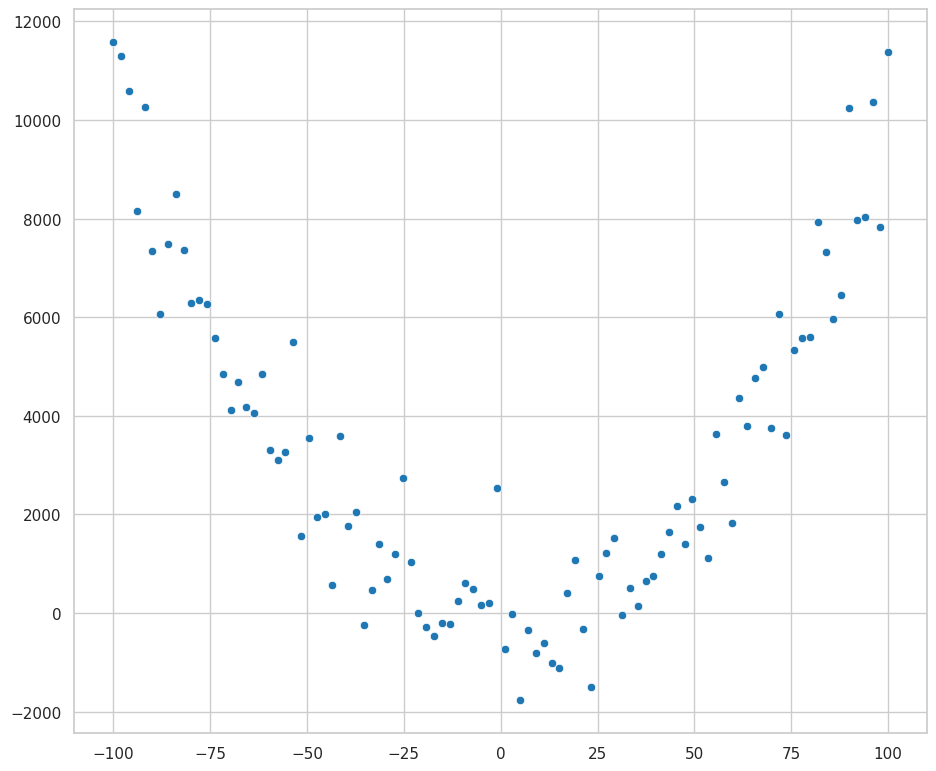

In [91]:
x=np.linspace(-100,100,100)
y=x**2
y += np.random.normal(0,1000,x.size)

sns.scatterplot(x=x,y=y)
np.corrcoef(x,y)

array([[1.       , 0.9165443],
       [0.9165443, 1.       ]])

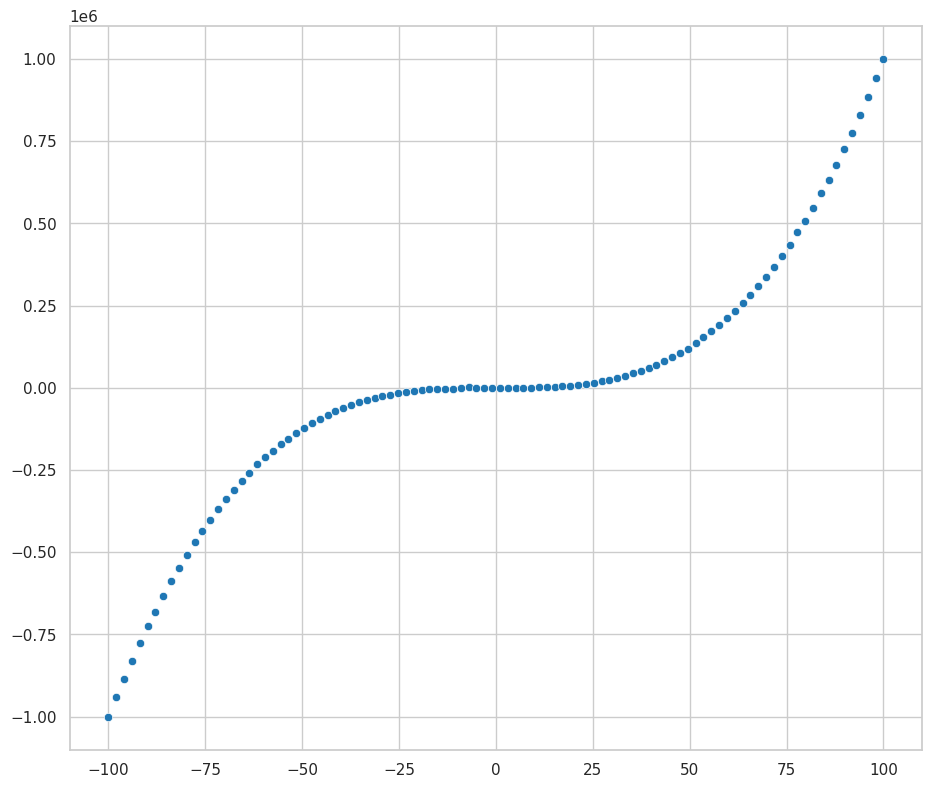

In [92]:
x=np.linspace(-100,100,100)
y=x**3
y += np.random.normal(0,1000,x.size)

sns.scatterplot(x=x,y=y)
np.corrcoef(x,y)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

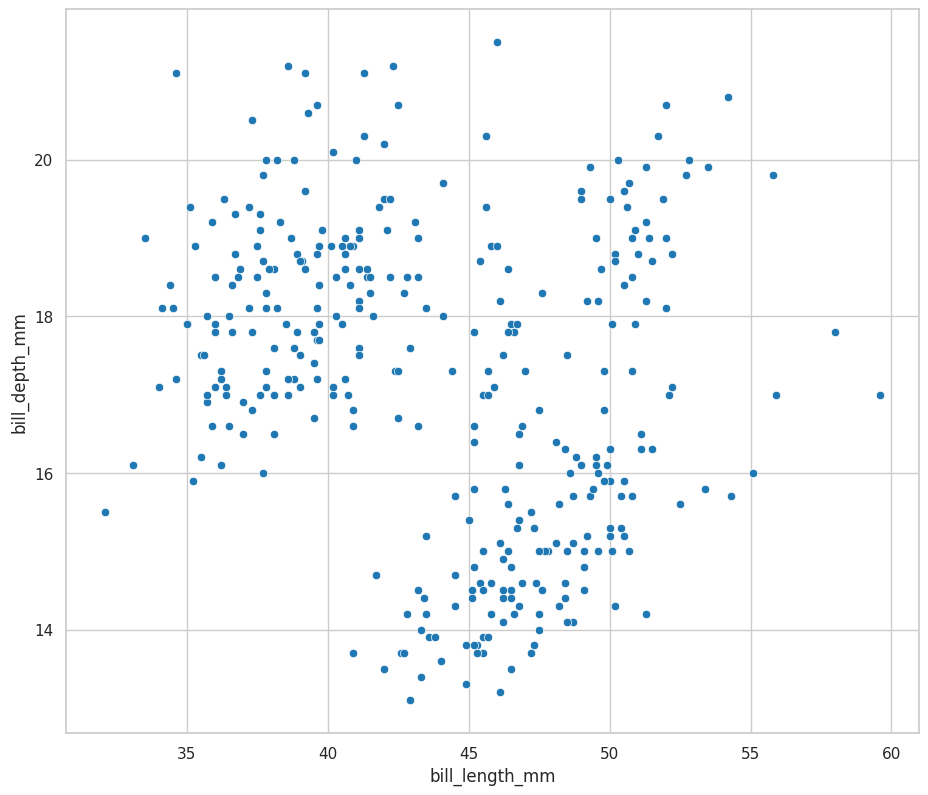

In [93]:
sns.scatterplot(
    data=df_preprocess_data,
    x='bill_length_mm',
    y='bill_depth_mm'
)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


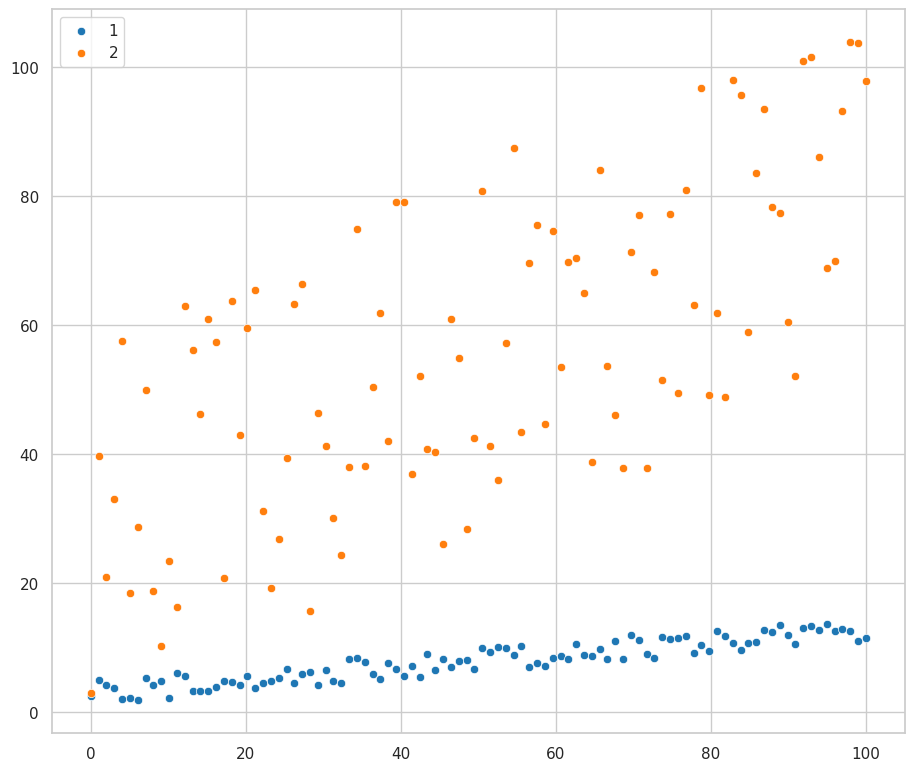

In [94]:
np.random.seed(42)
x_1 = np.linspace(0,100,100)
y_1 = 0.1* x_1 +3 + np.random.uniform(-2,2,size=x_1.size)

sns.scatterplot(x=x_1, y=y_1)


x_2 = np.linspace(0,100,100)
y_2 = 0.5* x_1 +1 + np.random.uniform(0,60,size=x_2.size)

sns.scatterplot(x=x_2, y=y_2)

plt.legend(["1","2"])

print(np.corrcoef(x_1,y_1))
print(np.corrcoef(x_2,y_2))

# Estableciendo relaciones: Análisis de regresión simple

In [95]:
res_1=scipy.stats.linregress(x=x_1,y=y_1)
res_2=scipy.stats.linregress(x=x_2,y=y_2)
print(res_1,res_2,sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


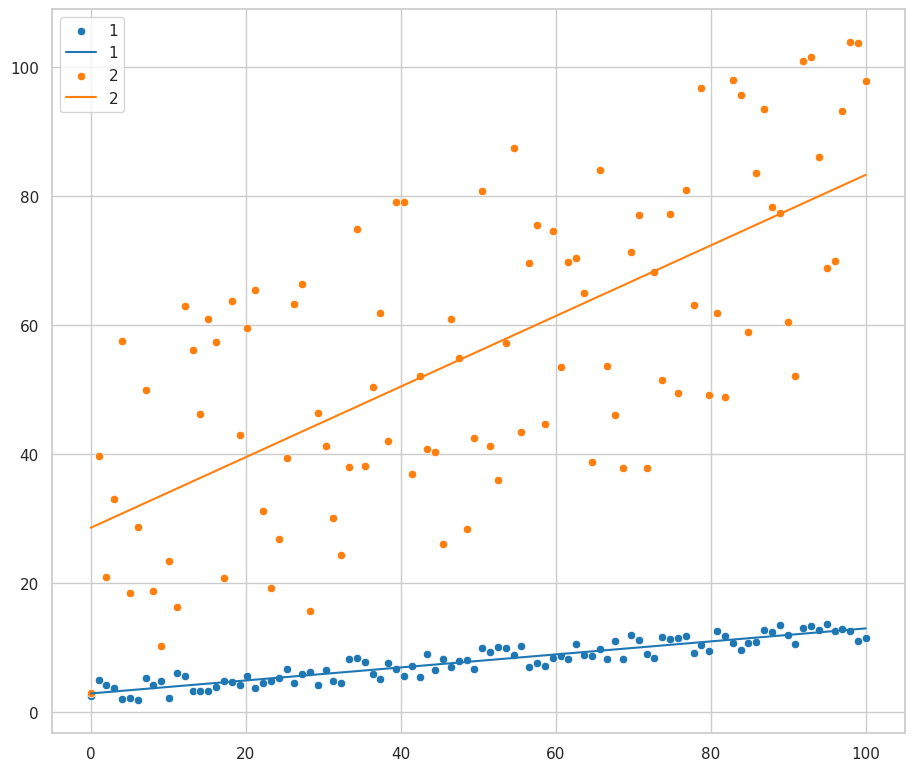

In [96]:
sns.scatterplot(x=x_1, y=y_1)

fx1 = np.array([x_1.min(), x_1.max()])
fy1 = res_1.intercept + res_1.slope * fx1

plt.plot(fx1, fy1)


sns.scatterplot(x=x_2, y=y_2)

fx2 = np.array([x_2.min(), x_2.max()])
fy2 = res_2.intercept + res_2.slope * fx2

plt.plot(fx2, fy2)

plt.legend(["1", "1","2","2"])

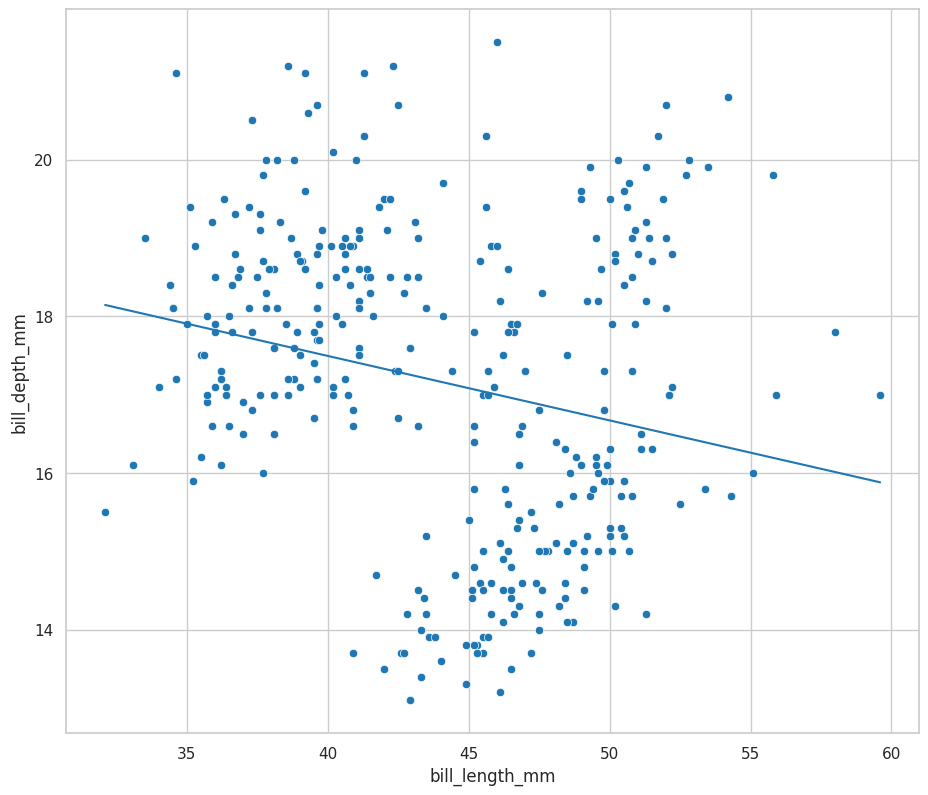

In [97]:
sns.scatterplot(data=df_preprocess_penguins,x='bill_length_mm',y='bill_depth_mm')
res_penguins=scipy.stats.linregress(x=df_preprocess_penguins.bill_length_mm,y=df_preprocess_penguins.bill_depth_mm)
res_penguins

fx1 = np.array([df_preprocess_penguins.bill_length_mm.max(), df_preprocess_penguins.bill_length_mm.min()])
fy1 = res_penguins.intercept + res_penguins.slope * fx1

plt.plot(fx1, fy1)

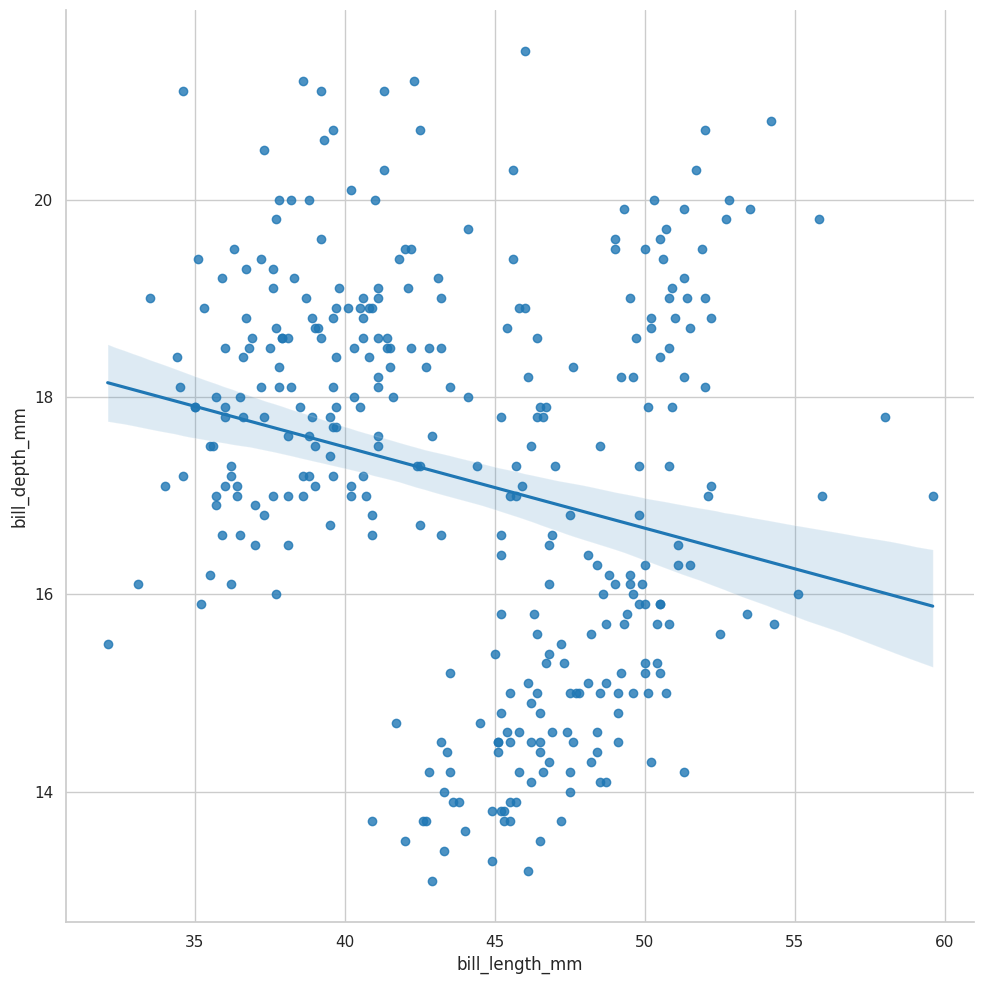

In [98]:
sns.lmplot(data=df_preprocess_penguins,x='bill_length_mm',y='bill_depth_mm',height=10)

LinregressResult(slope=50.153265942241134, intercept=-5872.092682842826, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=1.540230983824635, intercept_stderr=310.2851553513499)


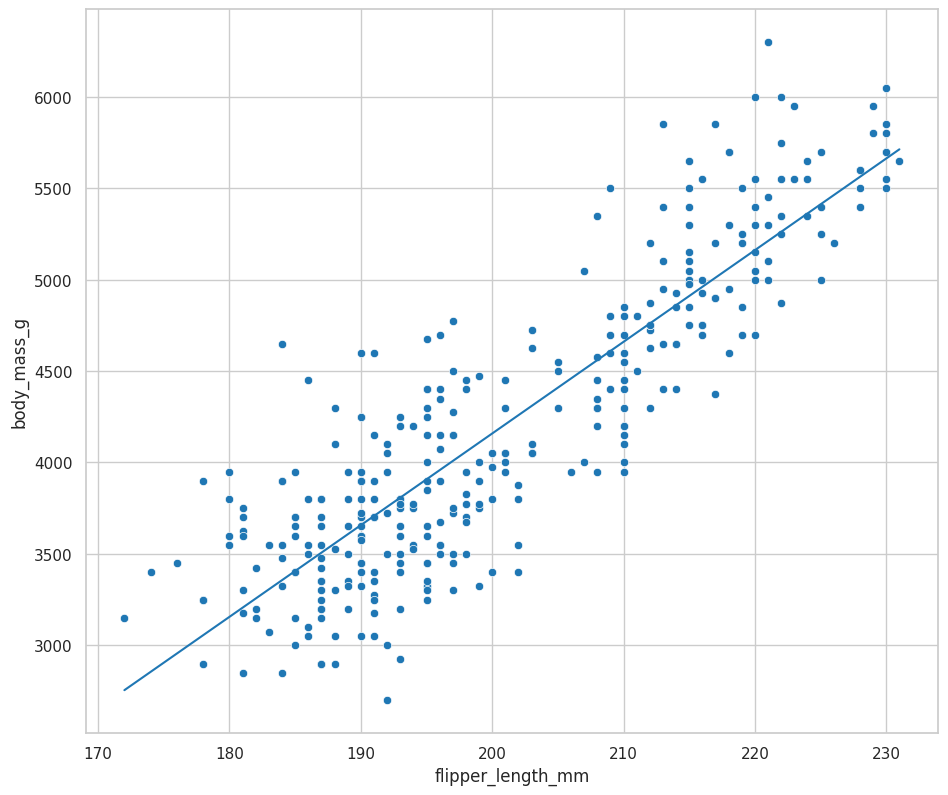

In [99]:
sns.scatterplot(data=df_preprocess_penguins,x='flipper_length_mm',y='body_mass_g')

res_linear=scipy.stats.linregress(x=df_preprocess_penguins.flipper_length_mm,y=df_preprocess_penguins.body_mass_g)
print(res_linear)

f_x_1=np.array([df_preprocess_penguins.flipper_length_mm.max(),df_preprocess_penguins.flipper_length_mm.min()])
f_y_1=res_linear.intercept + res_linear.slope * f_x_1

plt.plot(f_x_1,f_y_1)

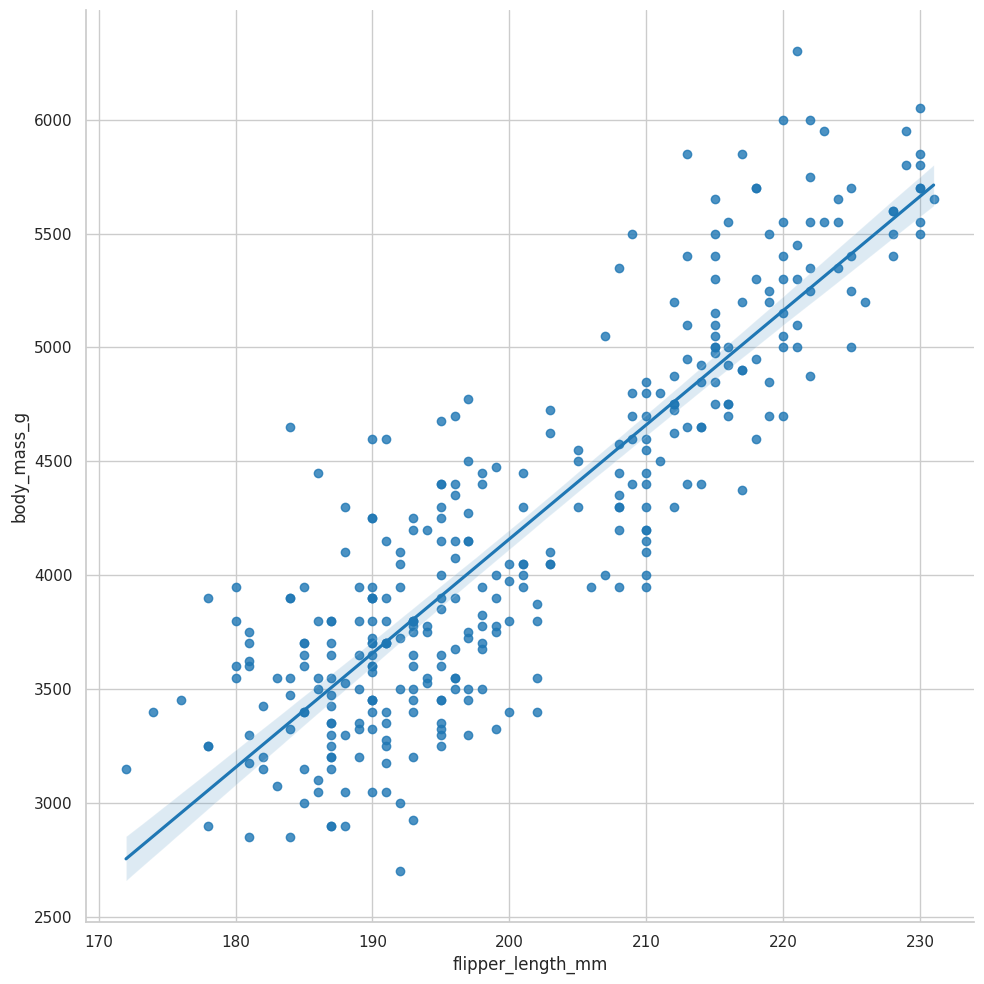

In [100]:
sns.lmplot(data=df_preprocess_penguins,x='flipper_length_mm',y='body_mass_g',height=10)

LinregressResult(slope=0.015195264815217668, intercept=137.03962089225467, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=0.00046665391049053467, intercept_stderr=1.9987694290243143)


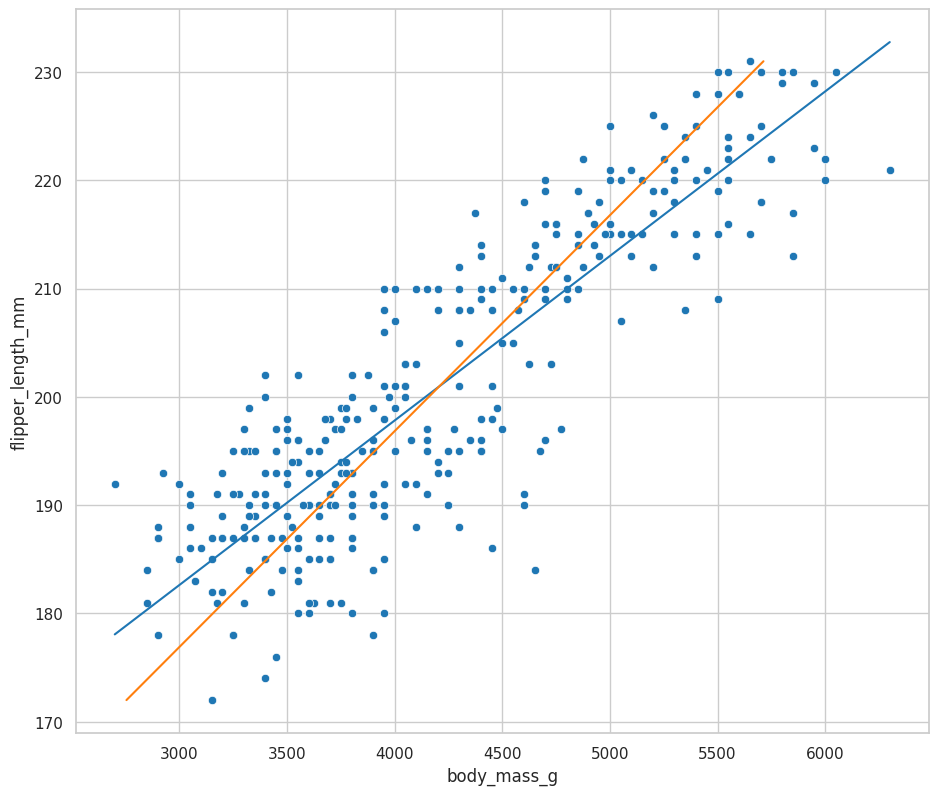

In [101]:
sns.scatterplot(data=df_preprocess_penguins,y='flipper_length_mm',x='body_mass_g')

res_linear=scipy.stats.linregress(y=df_preprocess_penguins.flipper_length_mm,x=df_preprocess_penguins.body_mass_g)
print(res_linear)

f_x=np.array([df_preprocess_penguins.body_mass_g.max(),df_preprocess_penguins.body_mass_g.min()])
f_y=res_linear.intercept + res_linear.slope * f_x

plt.plot(f_x,f_y)
plt.plot(f_y_1,f_x_1)

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [102]:
x=df_preprocess_penguins.bill_length_mm
y=df_preprocess_penguins.bill_depth_mm

res_x_y=scipy.stats.linregress(x=x,y=y)
res_y_x=scipy.stats.linregress(x=y,y=x)

print(res_x_y,res_y_x,sep='\n')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


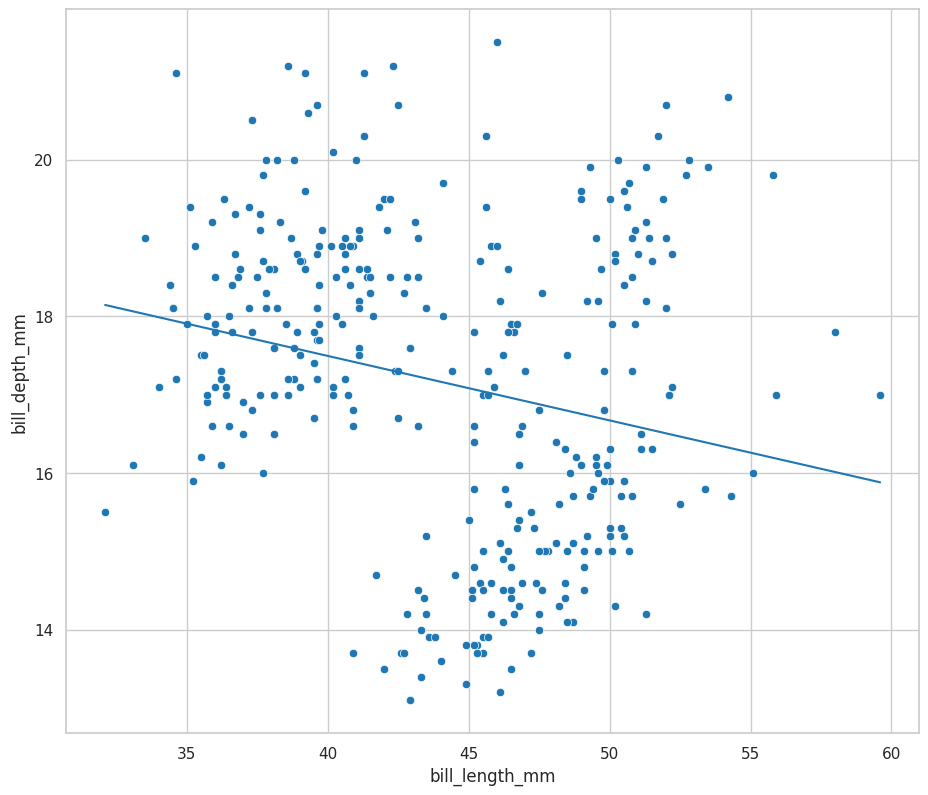

In [103]:
sns.scatterplot(x=x,y=y)

fx_1= np.array([x.min(), x.max()])
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1)

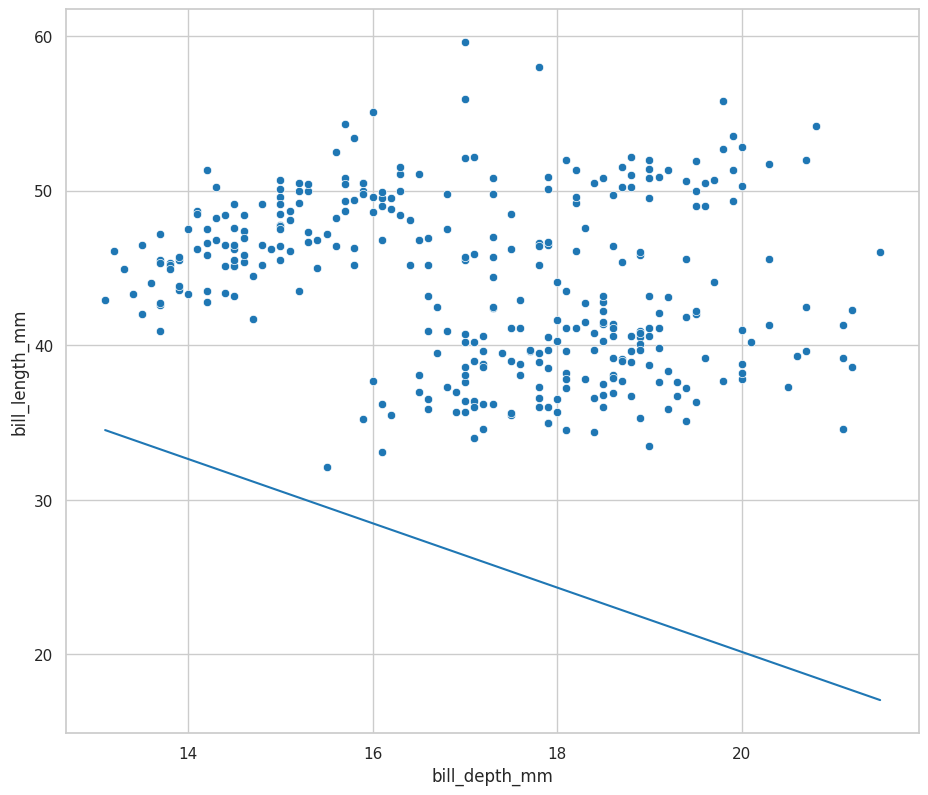

In [104]:
sns.scatterplot(x=y,y=x)

fx_2= np.array([y.min(), y.max()])
fy_2= res_y_x.intercept + res_y_x.slope * fx_1

plt.plot(fx_2, fy_2)

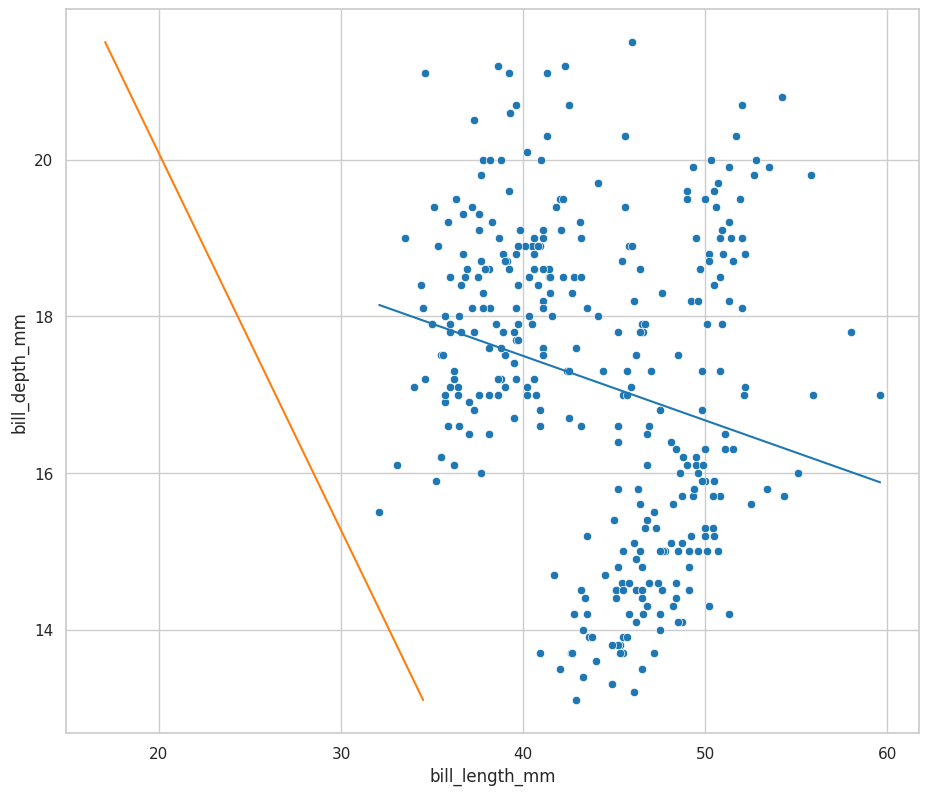

In [105]:
sns.scatterplot(x=x,y=y)


plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [106]:
smf.ols(formula='bill_length_mm ~ bill_depth_mm',data=df_preprocess_penguins).fit().params #x~y

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [107]:
smf.ols(formula='bill_depth_mm ~ bill_length_mm',data=df_preprocess_penguins).fit().params #x~y

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

In [108]:
model_1=smf.ols(formula='body_mass_g ~ bill_length_mm',data=df_preprocess_penguins).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.54e-32
Time:                        03:35:04   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

In [109]:
model_2=smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm',data=df_preprocess_penguins).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           7.04e-46
Time:                        03:35:04   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

In [110]:
model_3=smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm  + flipper_length_mm',data=df_preprocess_penguins).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Thu, 29 Dec 2022   Prob (F-statistic):          9.26e-103
Time:                        03:35:04   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

In [111]:
model_4=smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm  + flipper_length_mm + C(sex)',data=df_preprocess_penguins).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Thu, 29 Dec 2022   Prob (F-statistic):          6.28e-122
Time:                        03:35:04   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 5

In [112]:
model_5=smf.ols(formula='body_mass_g ~ flipper_length_mm + C(sex)',data=df_preprocess_penguins).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Thu, 29 Dec 2022   Prob (F-statistic):          3.53e-118
Time:                        03:35:04   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

#### Creación de tabla de resultados

In [113]:
model_results=pd.DataFrame(
    dict(
        actual_vaule=df_preprocess_penguins.body_mass_g,
        prediction_model_1=model_1.predict(),
        prediction_model_2=model_2.predict(),
        prediction_model_3=model_3.predict(),
        prediction_model_4=model_4.predict(),
        prediction_model_5=model_5.predict(),
        species=df_preprocess_penguins.species,
        sex=df_preprocess_penguins.sex
    )
)
model_results

actual_vaule  prediction_model_1  prediction_model_2  prediction_model_3  \
0          3750.0         3782.402961         3617.641192         3204.761227   
1          3800.0         3817.119665         3836.725580         3436.701722   
2          3250.0         3886.553073         3809.271371         3906.897032   
4          3450.0         3574.102738         3350.786581         3816.705772   
5          3650.0         3799.761313         3356.140070         3696.168128   
..            ...                 ...                 ...                 ...   
339        4000.0         5231.825347         4706.954140         4599.187485   
340        3400.0         4164.286703         4034.121055         4274.552753   
341        3775.0         4693.716437         4475.927353         3839.563668   
342        4100.0         4797.866549         4449.296758         4720.740455   
343        3775.0         4745.791493         4448.061337         4104.268240   

     prediction_model_4  prediction_model_5    species     sex  
0           3579.136946         3441.323750     Adelie    male  
1           3343.220772         3328.384372     Adelie  female  
2           3639.137335         3751.223949     Adelie  female  
4           3457.954243         3657.259599     Adelie  female  
5           3764.536023         3864.163327     Adelie    male  
..                  ...                 ...        ...     ...  
339         4455.022405         4662.860306  Chinstrap    male  
340         3894.857519         4080.099176  Chinstrap  female  
341         4063.639819         4005.109853  Chinstrap    male  
342         4652.013882         4803.806832  Chinstrap    male  
343         3672.299099         3892.170475  Chinstrap  female  

[333 rows x 8 columns]

#### ECDFs

<AxesSubplot: ylabel='Proportion'>

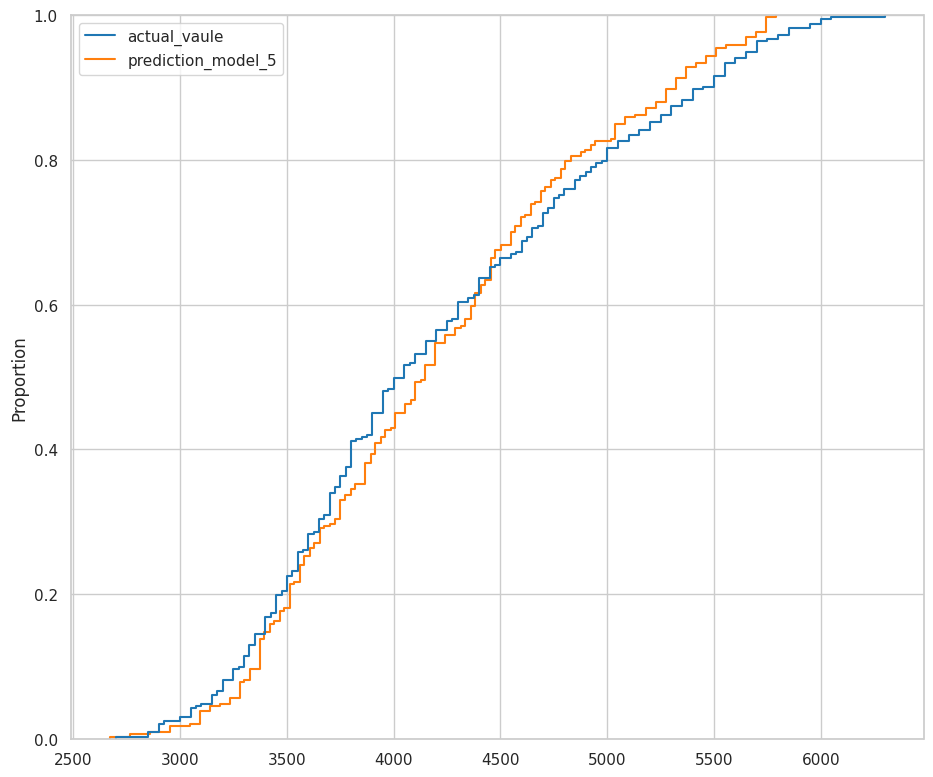

In [114]:
sns.ecdfplot(
    data=model_results.select_columns(['actual_vaule', 'prediction_model_5'])

)

<AxesSubplot: ylabel='Proportion'>

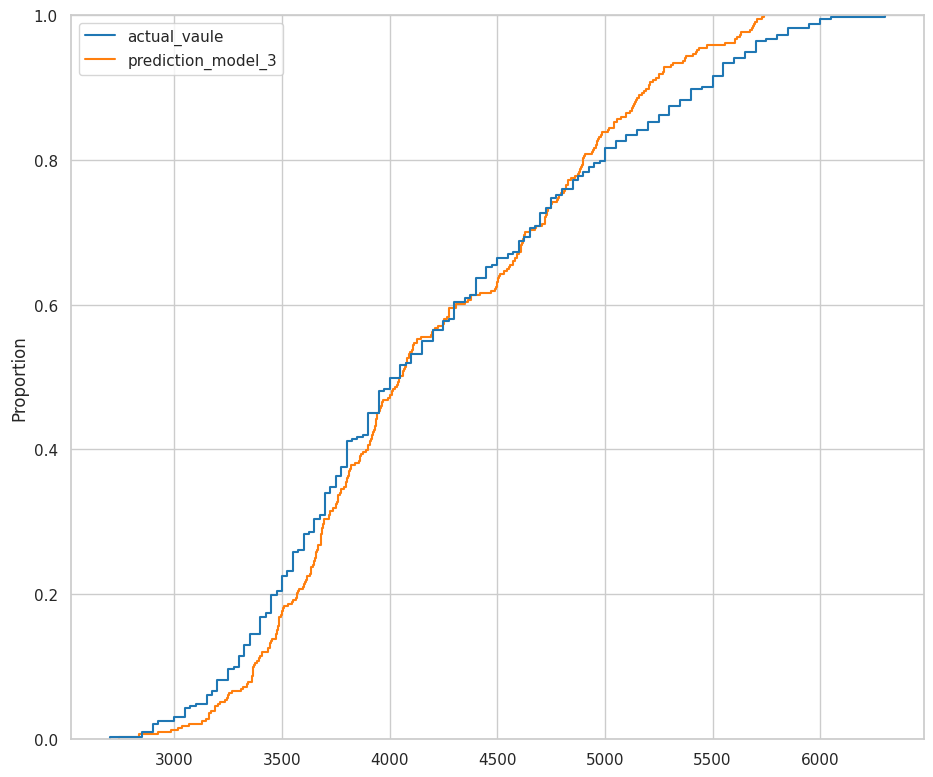

In [115]:
sns.ecdfplot(
    data=model_results.select_columns(['actual_vaule', 'prediction_model_3'])

)

#### PDFs

<AxesSubplot: ylabel='Density'>

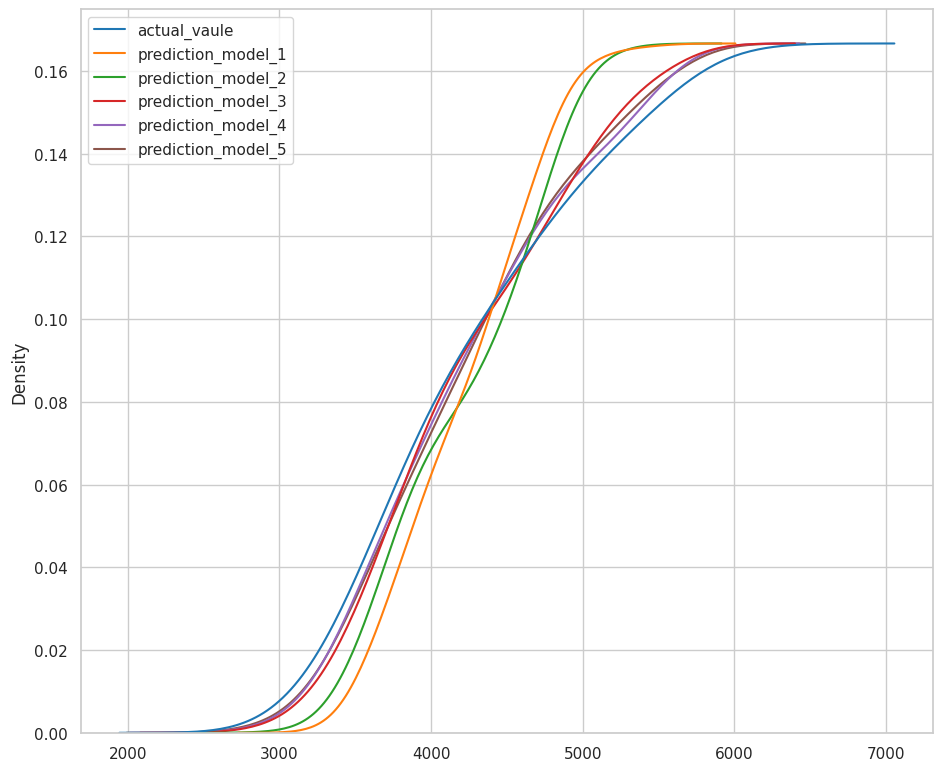

In [116]:
sns.kdeplot(data=model_results,cumulative=True)

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

In [117]:
sns.lmplot(data=df_preprocess_data,x='flipper_length_mm',y='body_mass_g',hue='sex',height=10|)

SyntaxError: invalid syntax (3946128940.py, line 1)

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [122]:
model_r_l=smf.logit(formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',data=df_preprocess_penguins).fit()
model_r_l.summary() #coef positivo, más probable que suceda , negativo menos probable que suceda

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Thu, 29 Dec 2022   Pseudo R-squ.:                  0.4793
Time:                        01:57:19   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

## Exploración de nuestras variables categóricas

In [126]:
df_preprocess_penguins.value_counts(['island','sex']).reset_index(name='count')

island     sex  count
0     Biscoe    male     83
1     Biscoe  female     80
2      Dream    male     62
3      Dream  female     61
4  Torgersen  female     24
5  Torgersen    male     23

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

In [127]:
df_preprocess_penguins.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [129]:
df_preprocess_penguins=(df_preprocess_penguins.assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'],[1,0,0])))

In [183]:
model_is_adelie=smf.logit(formula='is_adelie ~ bill_length_mm + flipper_length_mm + C(sex) ',data=df_preprocess_penguins).fit()

model_is_adelie.summary()

Optimization terminated successfully.
         Current function value: 0.013853
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              is_adelie   No. Observations:                  333
Model:                          Logit   Df Residuals:                      329
Method:                           MLE   Df Model:                            3
Date:                Thu, 29 Dec 2022   Pseudo R-squ.:                  0.9798
Time:                        02:37:06   Log-Likelihood:                -4.6131
converged:                       True   LL-Null:                       -228.29
Covariance Type:            nonrobust   LLR p-value:                 1.224e-96
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           269.5979    119.738      2.252      0.024      34.916     504.280
C(sex)[T.male]       26.0776     12.054      2.163      0.031       2.453      49.703
bill_length_mm       -4.2983      1.918     -2.241      0.025      -8.057      -0.540
flipper_length_mm    -0.4885      0.238     -2.056      0.040      -0.954      -0.023
=====================================================================================

Possibly complete quasi-separation: A fraction 0.90 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

/tmp/ipykernel_98/1766482268.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_preprocess_penguins.corr(),vmin=-1,vmax=1,annot=True)


<AxesSubplot: >

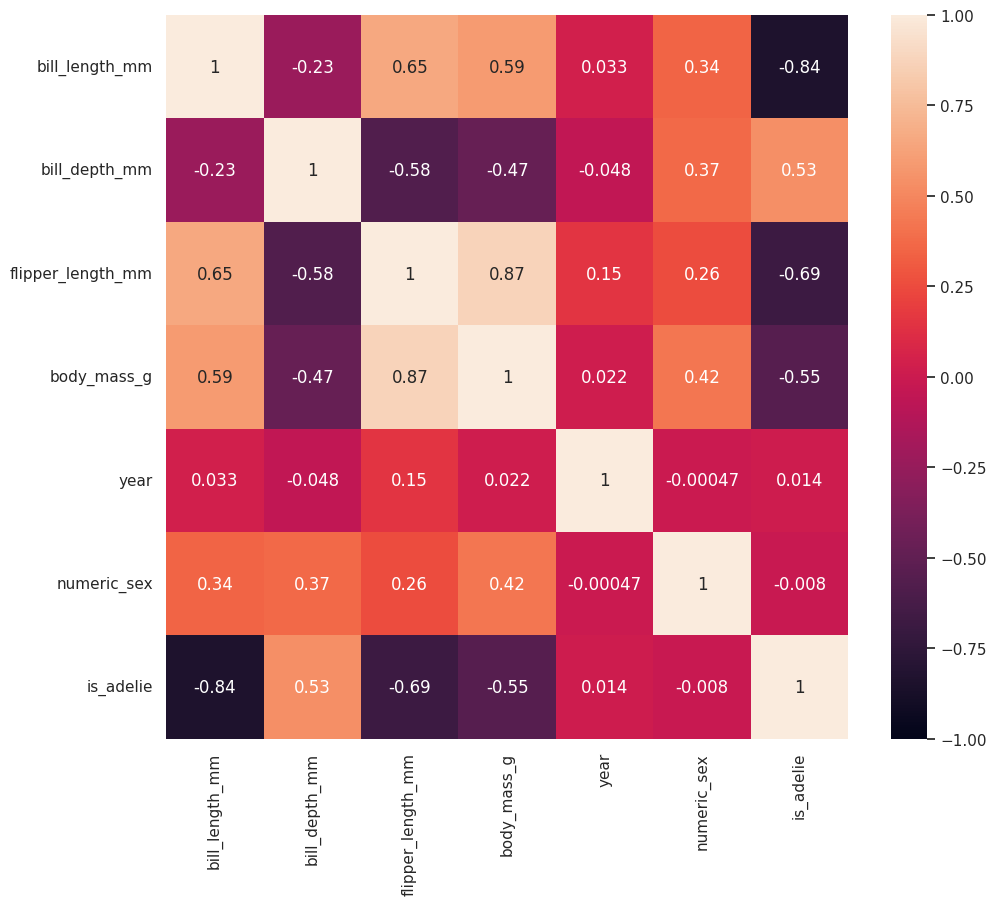

In [172]:
sns.heatmap(df_preprocess_penguins.corr(),vmin=-1,vmax=1,annot=True)

In [184]:
df_preprocess_penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  numeric_sex  is_adelie  
0         3750.0    male  2007            1          1  
1         3800.0  female  2007            0          1  
2         3250.0  female  2007            0          1  
4         3450.0  female  2007            0          1  
5         3650.0    male  2007            1          1  
..           ...     ...   ...          ...        ...  
339       4000.0    male  2009            1          0  
340       3400.0  female  2009            0          0  
341       3775.0    male  2009            1          0  
342       4100.0    male  2009            1          0  
343       3775.0  female  2009            0          0  

[333 rows x 10 columns]

In [185]:
prob_model=pd.DataFrame(dict(
    is_adeli=df_preprocess_penguins.is_adelie,
    resulta=model_is_adelie.predict().round()
))

prob_model

is_adeli  resulta
0           1      1.0
1           1      1.0
2           1      1.0
4           1      1.0
5           1      1.0
..        ...      ...
339         0      0.0
340         0      0.0
341         0      0.0
342         0      0.0
343         0      0.0

[333 rows x 2 columns]

In [186]:
prob_model.value_counts(['is_adeli','resulta']).reset_index(name='counts')

is_adeli  resulta  counts
0         0      0.0     186
1         1      1.0     146
2         0      1.0       1

In [187]:
print(
    sklearn.metrics.confusion_matrix(
        prob_model.is_adeli,
        prob_model.resulta
    )
)

sklearn.metrics.accuracy_score(
    prob_model.is_adeli,
    prob_model.resulta
)

[[186   1]
 [  0 146]]


0.996996996996997

# Paradoja de Simpson

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

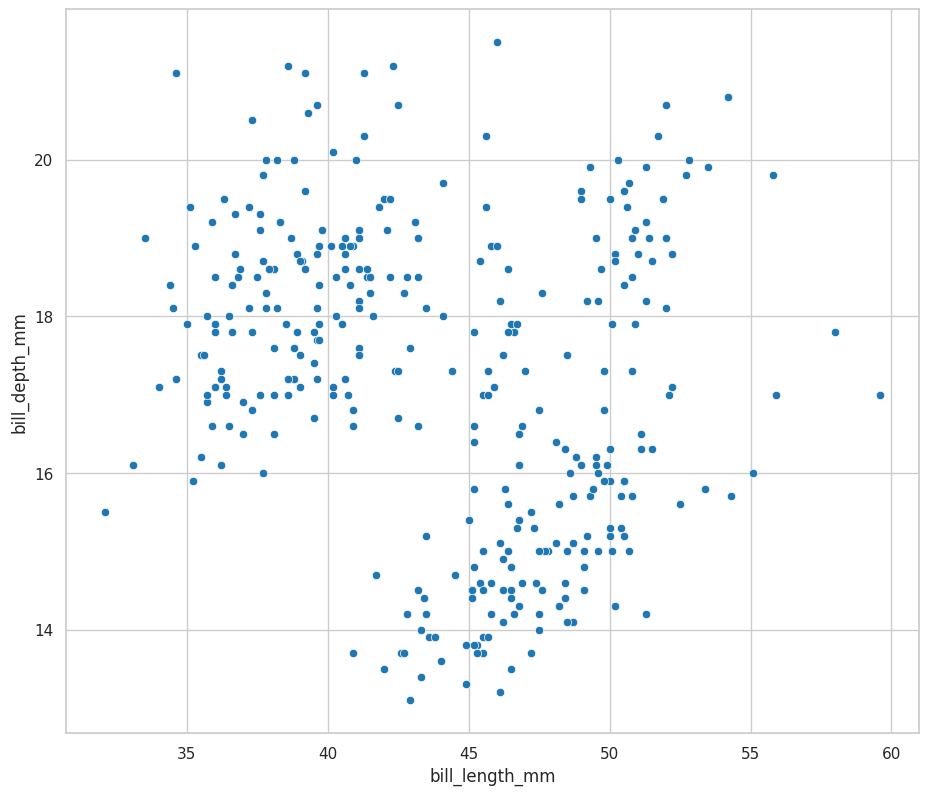

In [188]:
sns.scatterplot(data=df_preprocess_penguins,x='bill_length_mm',y='bill_depth_mm')

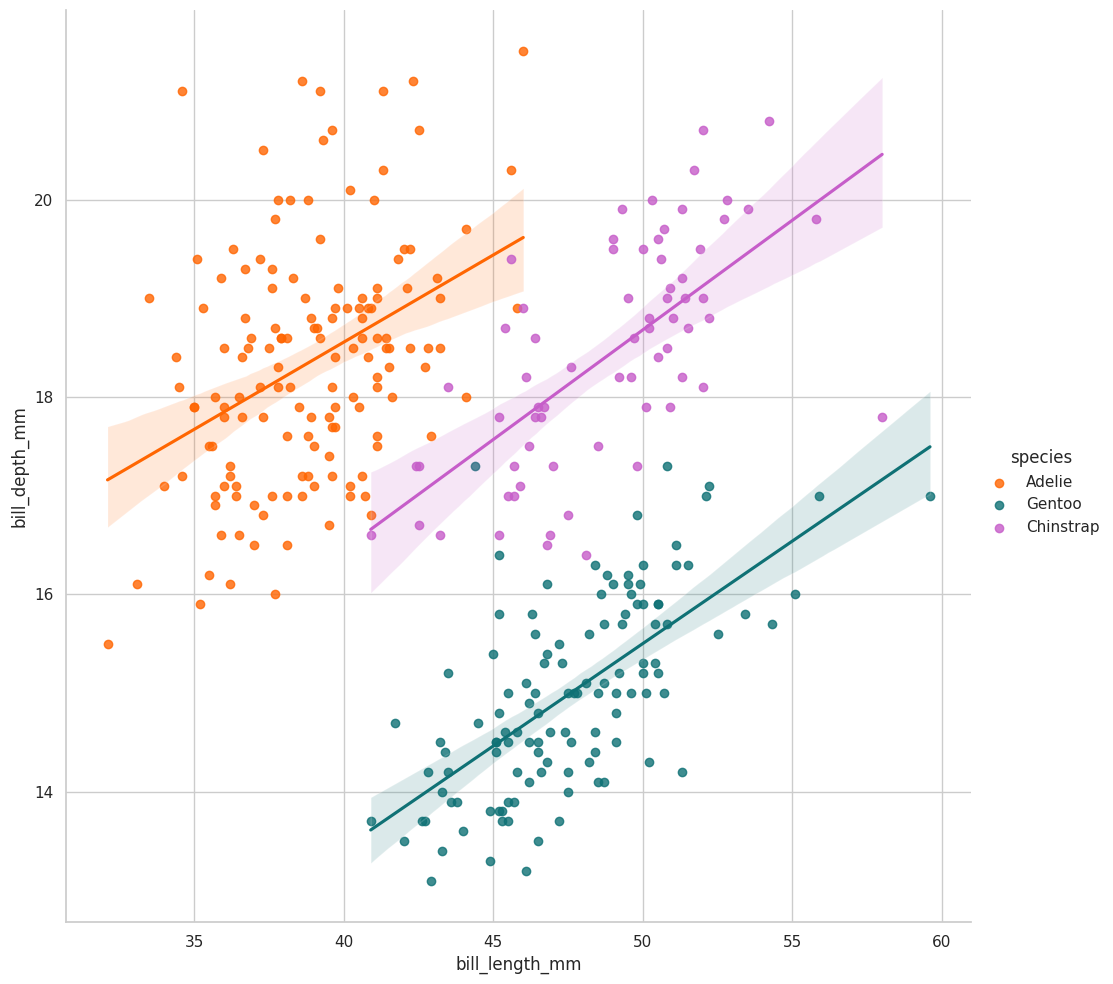

In [194]:
sns.lmplot(data=df_preprocess_penguins,x='bill_length_mm',y='bill_depth_mm',hue='species',height=10,palette=penguin_color)

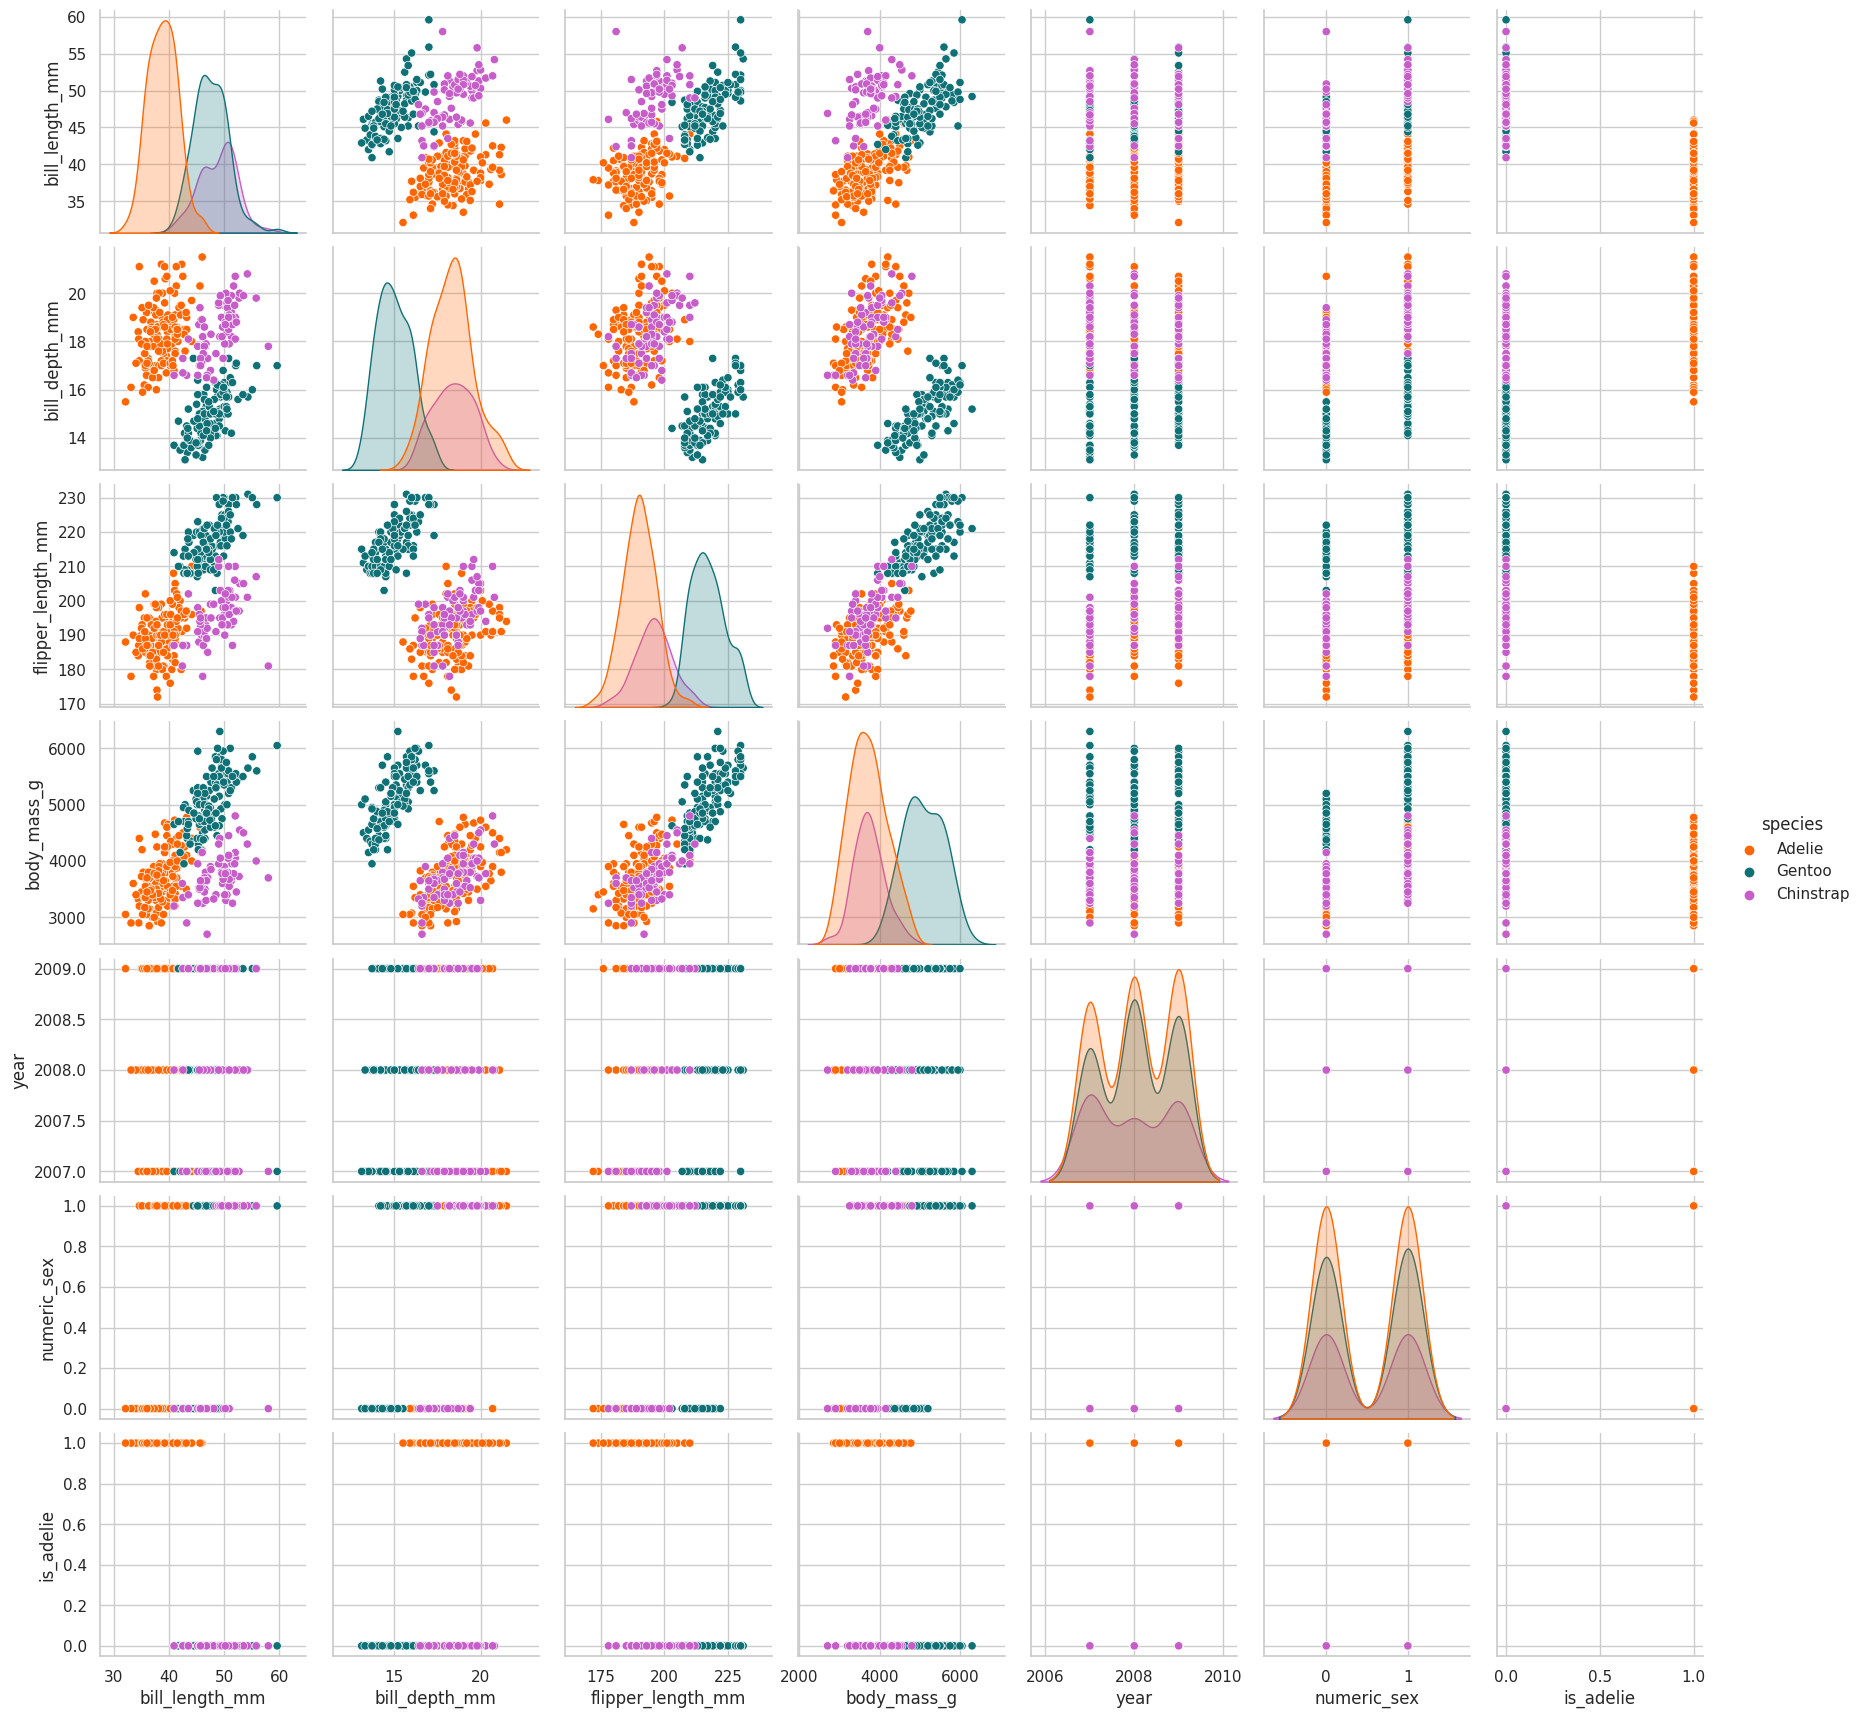

In [196]:
sns.pairplot(data=df_preprocess_penguins,hue='species',palette=penguin_color)

## Información de sesión

In [ ]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f57a60bf-9c9d-43fd-a5fd-55c65155a179' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>